###Importing YOLOv11 Model

In [11]:
!pip install ultralytics

In [12]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.6/112.6 GB disk)


In [13]:
from ultralytics import YOLO
from IPython.display import Image

###Download Dataset from Roboflow

In [14]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rbszMC9UPFhA5dovvoMu")
project = rf.workspace("princes-space").project("qr-code-80bee-ula7p")
version = project.version(1)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...


In [15]:
dataset.location

'/content/QR-code-1'

###Train YOLO11 Model on a Custom Dataset

In [46]:
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/QR-code-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

###Visualizing the Training Results

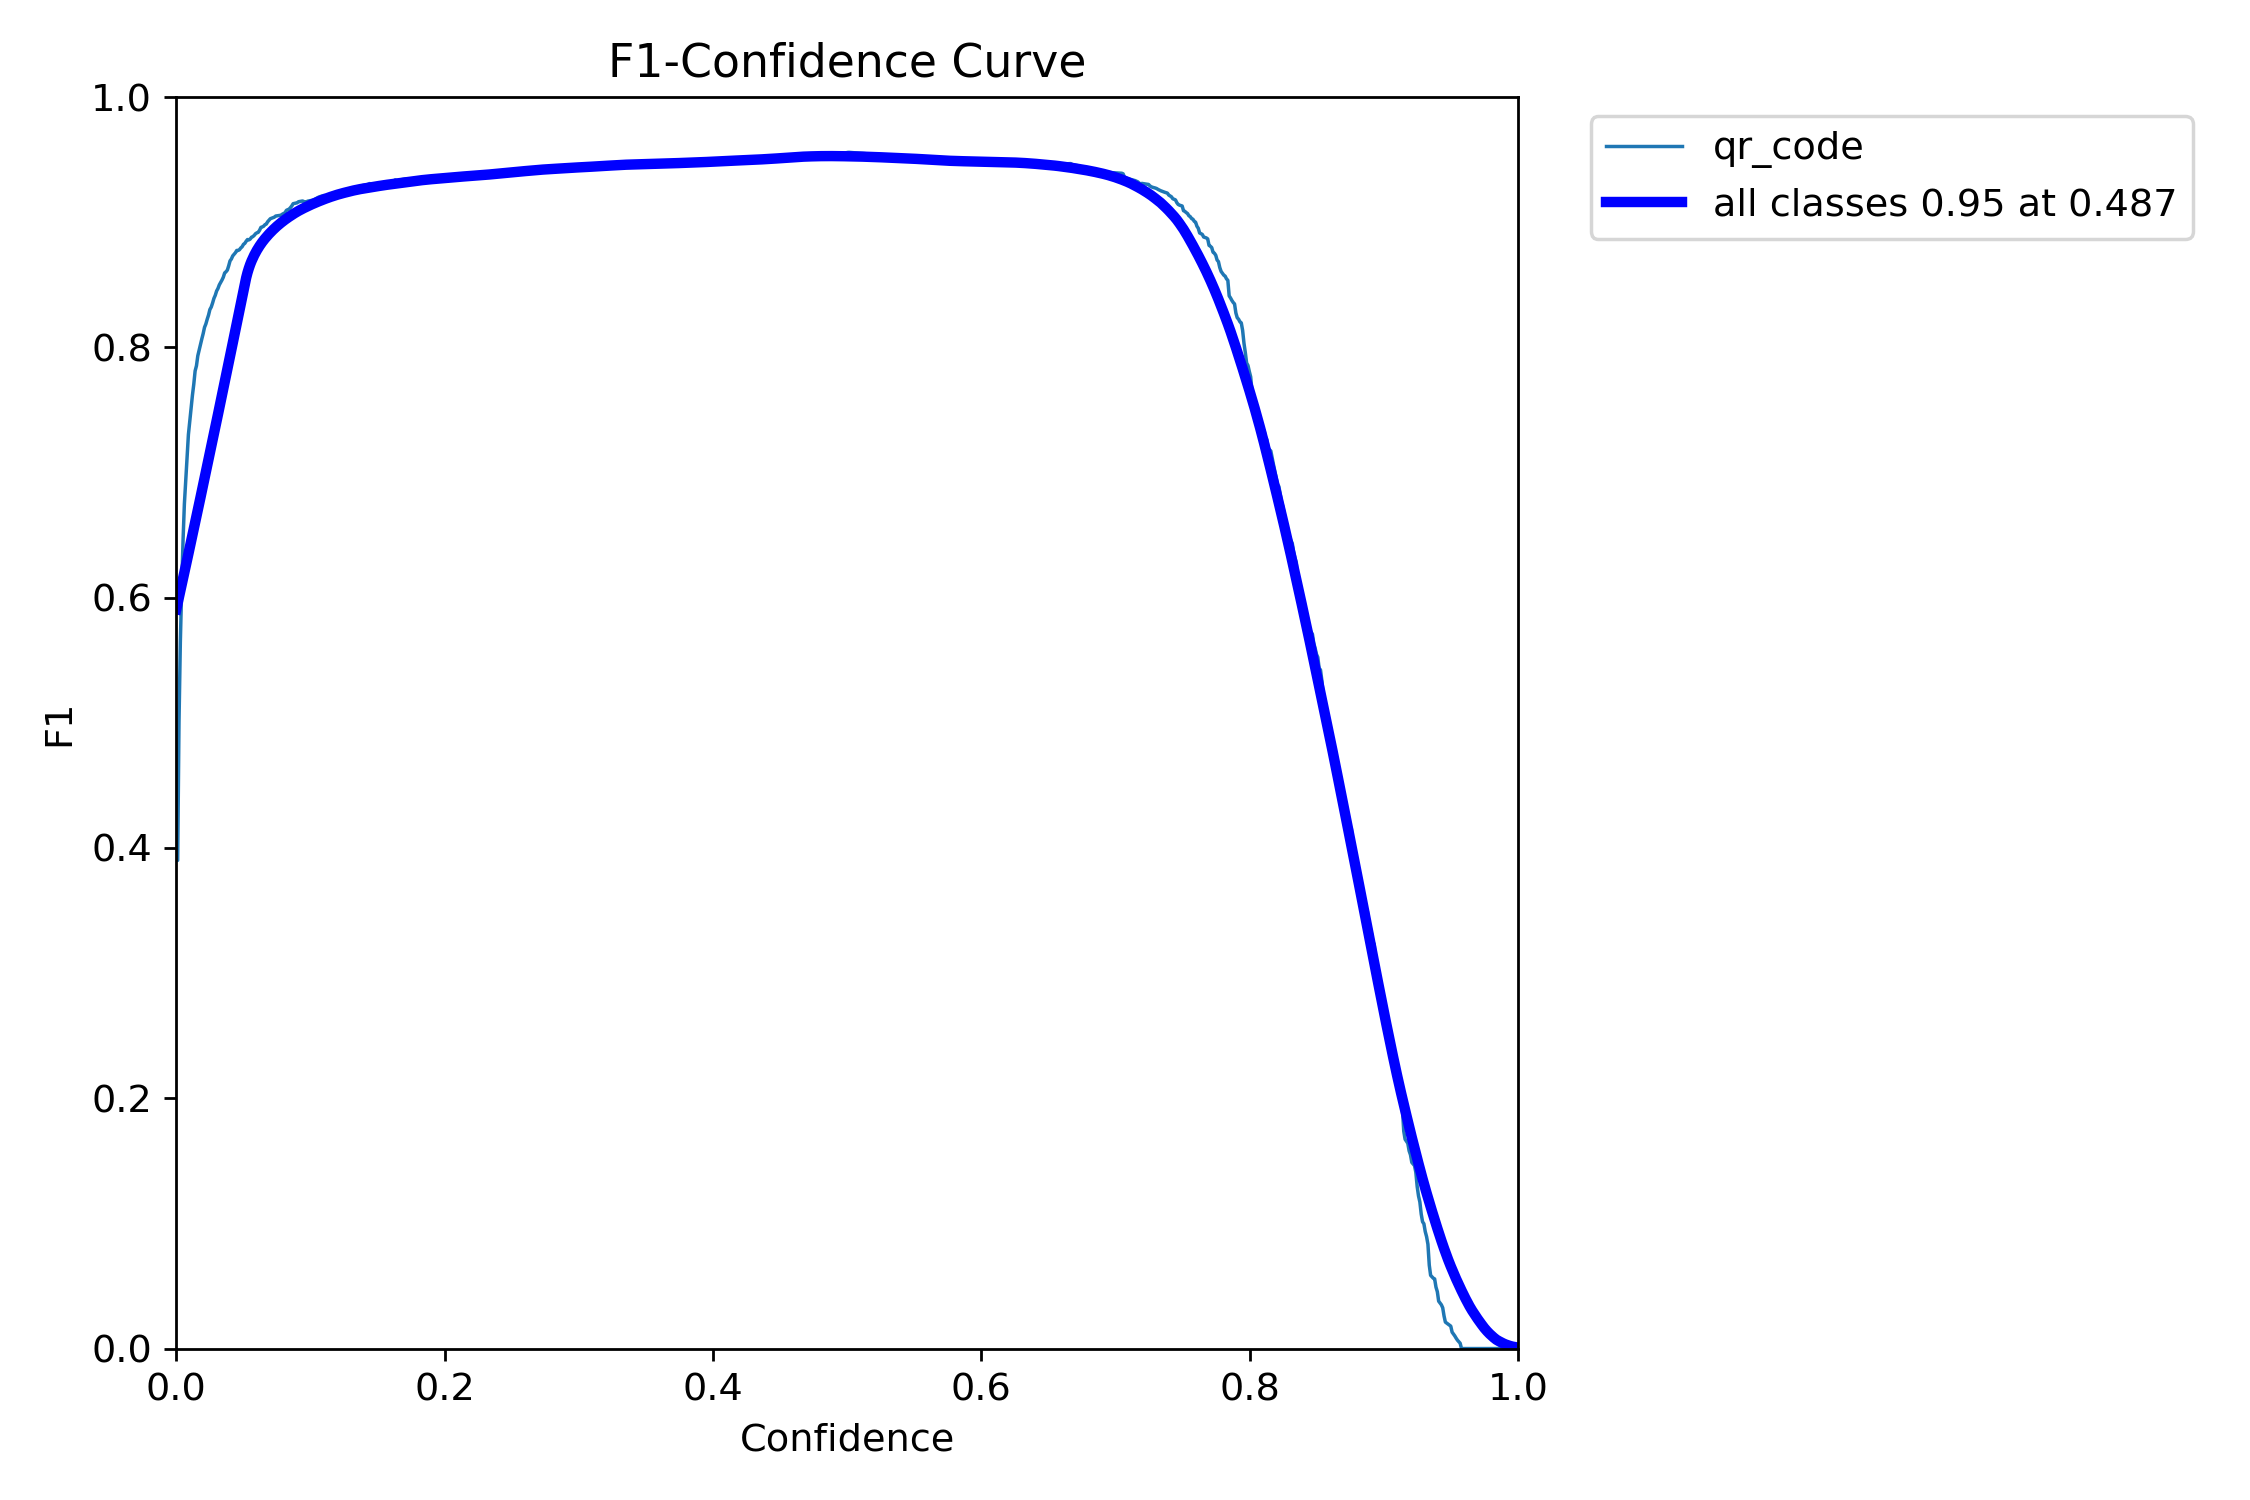

In [47]:
Image("/content/runs/detect/train/BoxF1_curve.png" , width=600)

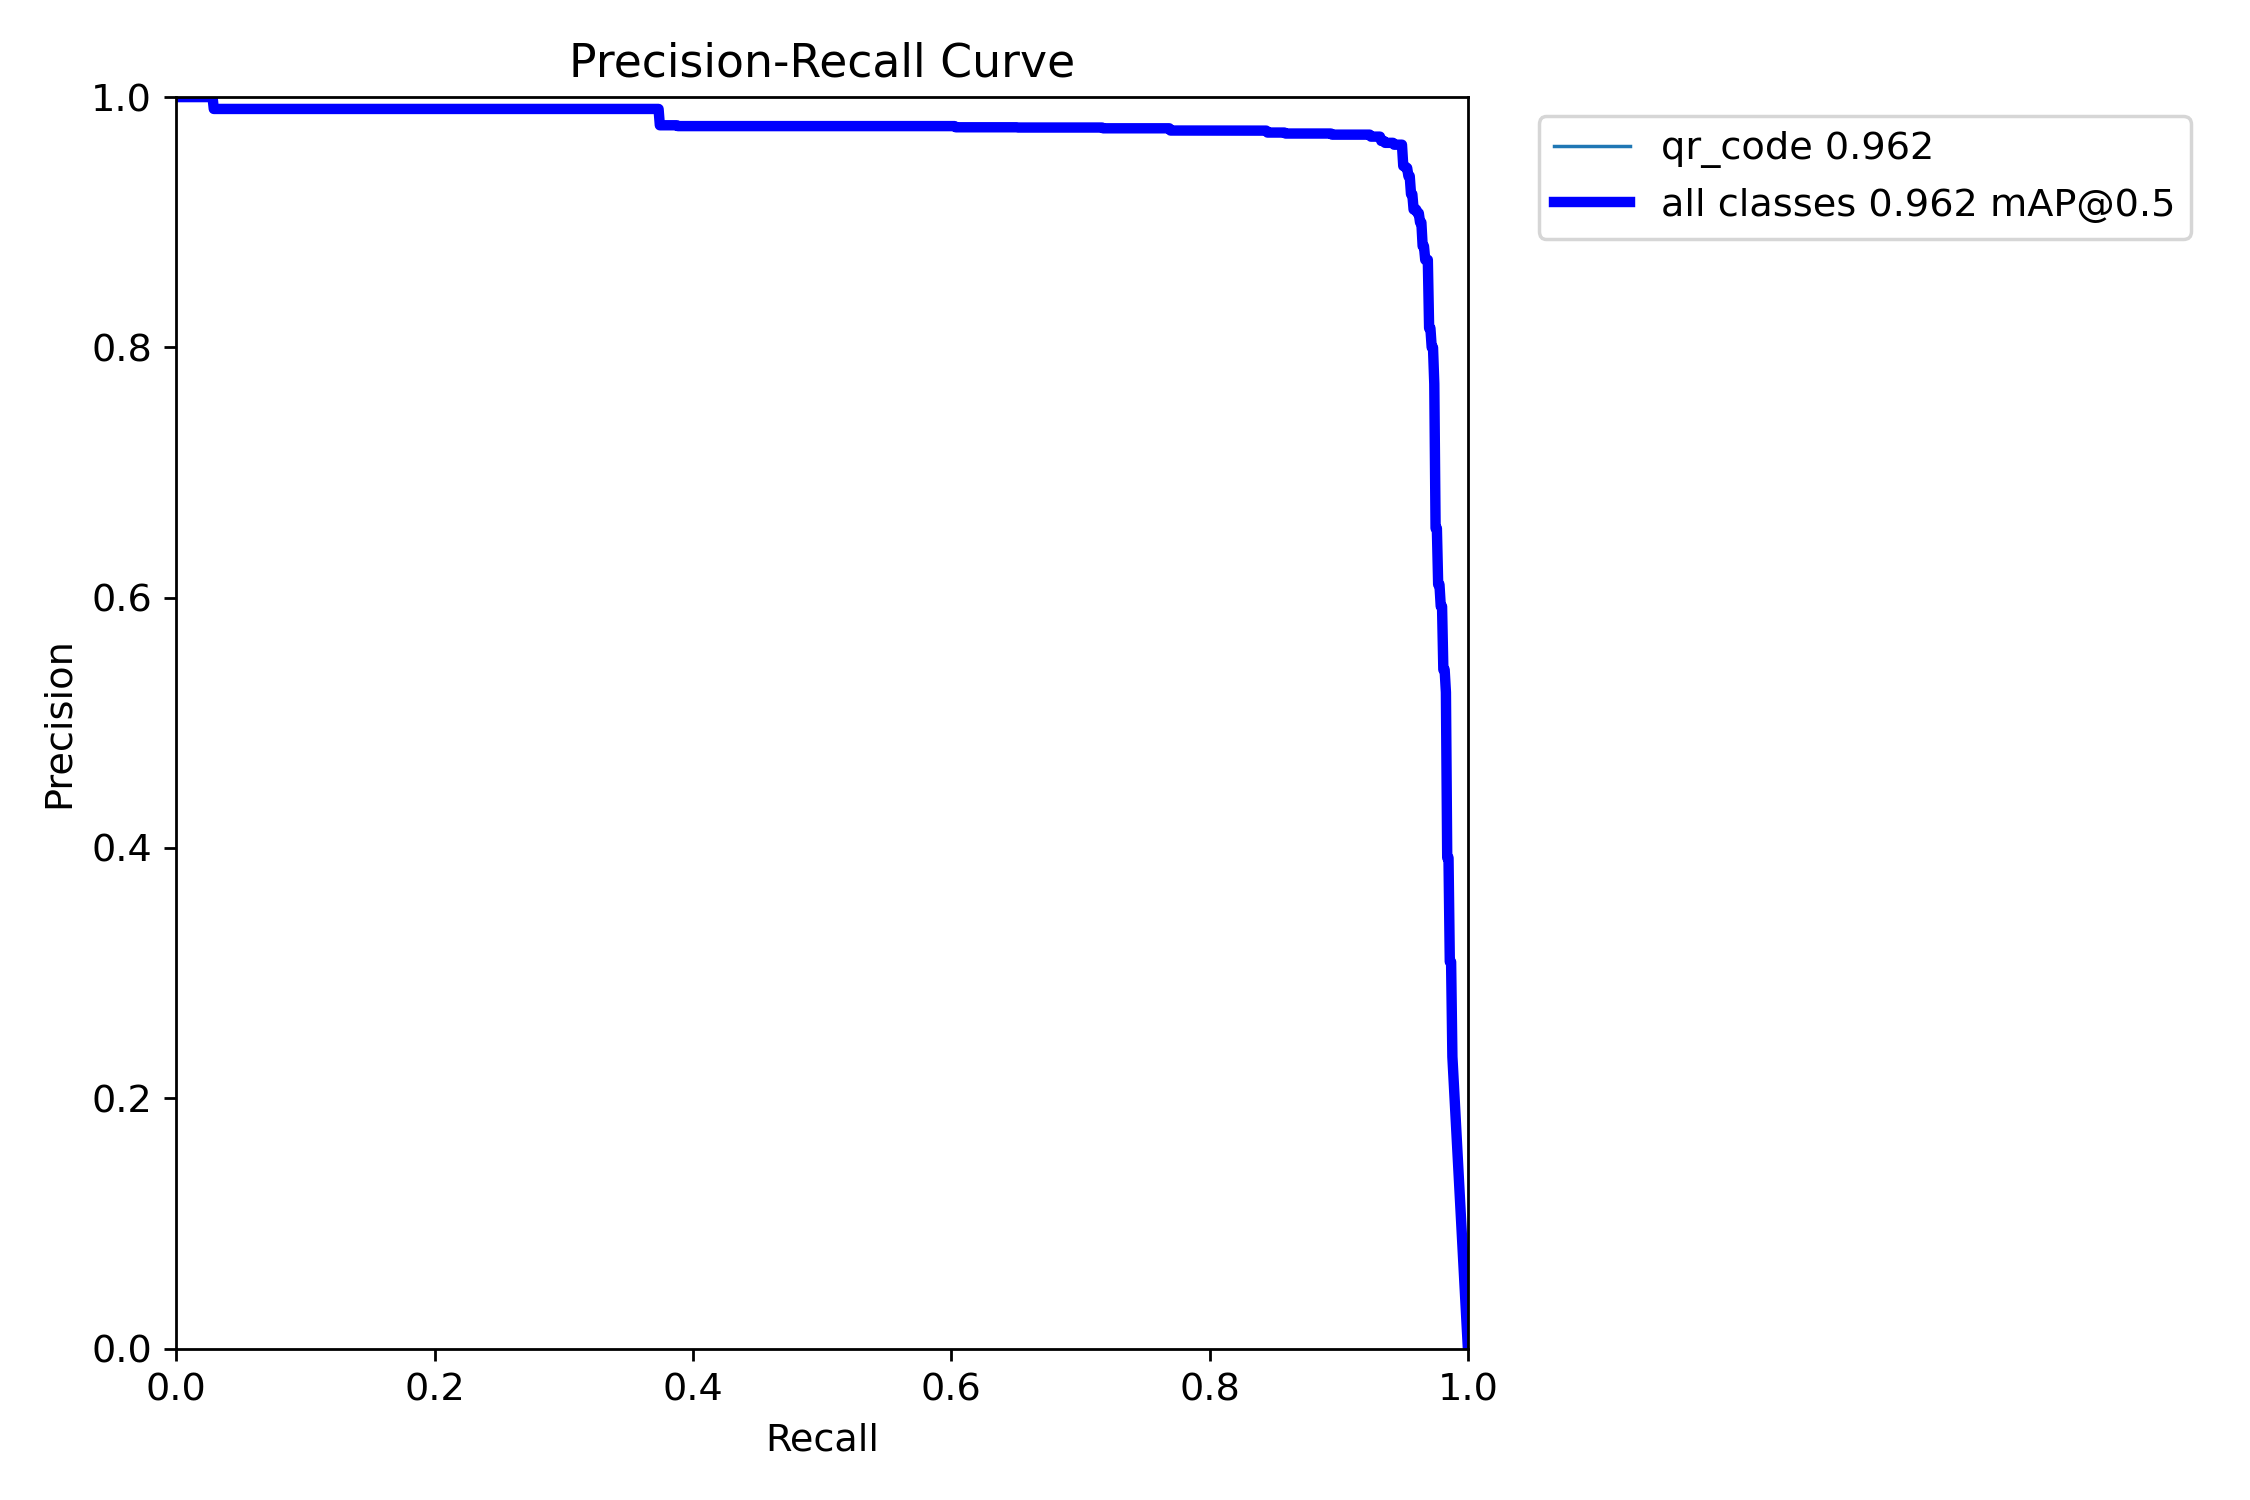

In [48]:
Image("/content/runs/detect/train/BoxPR_curve.png", width = 600)

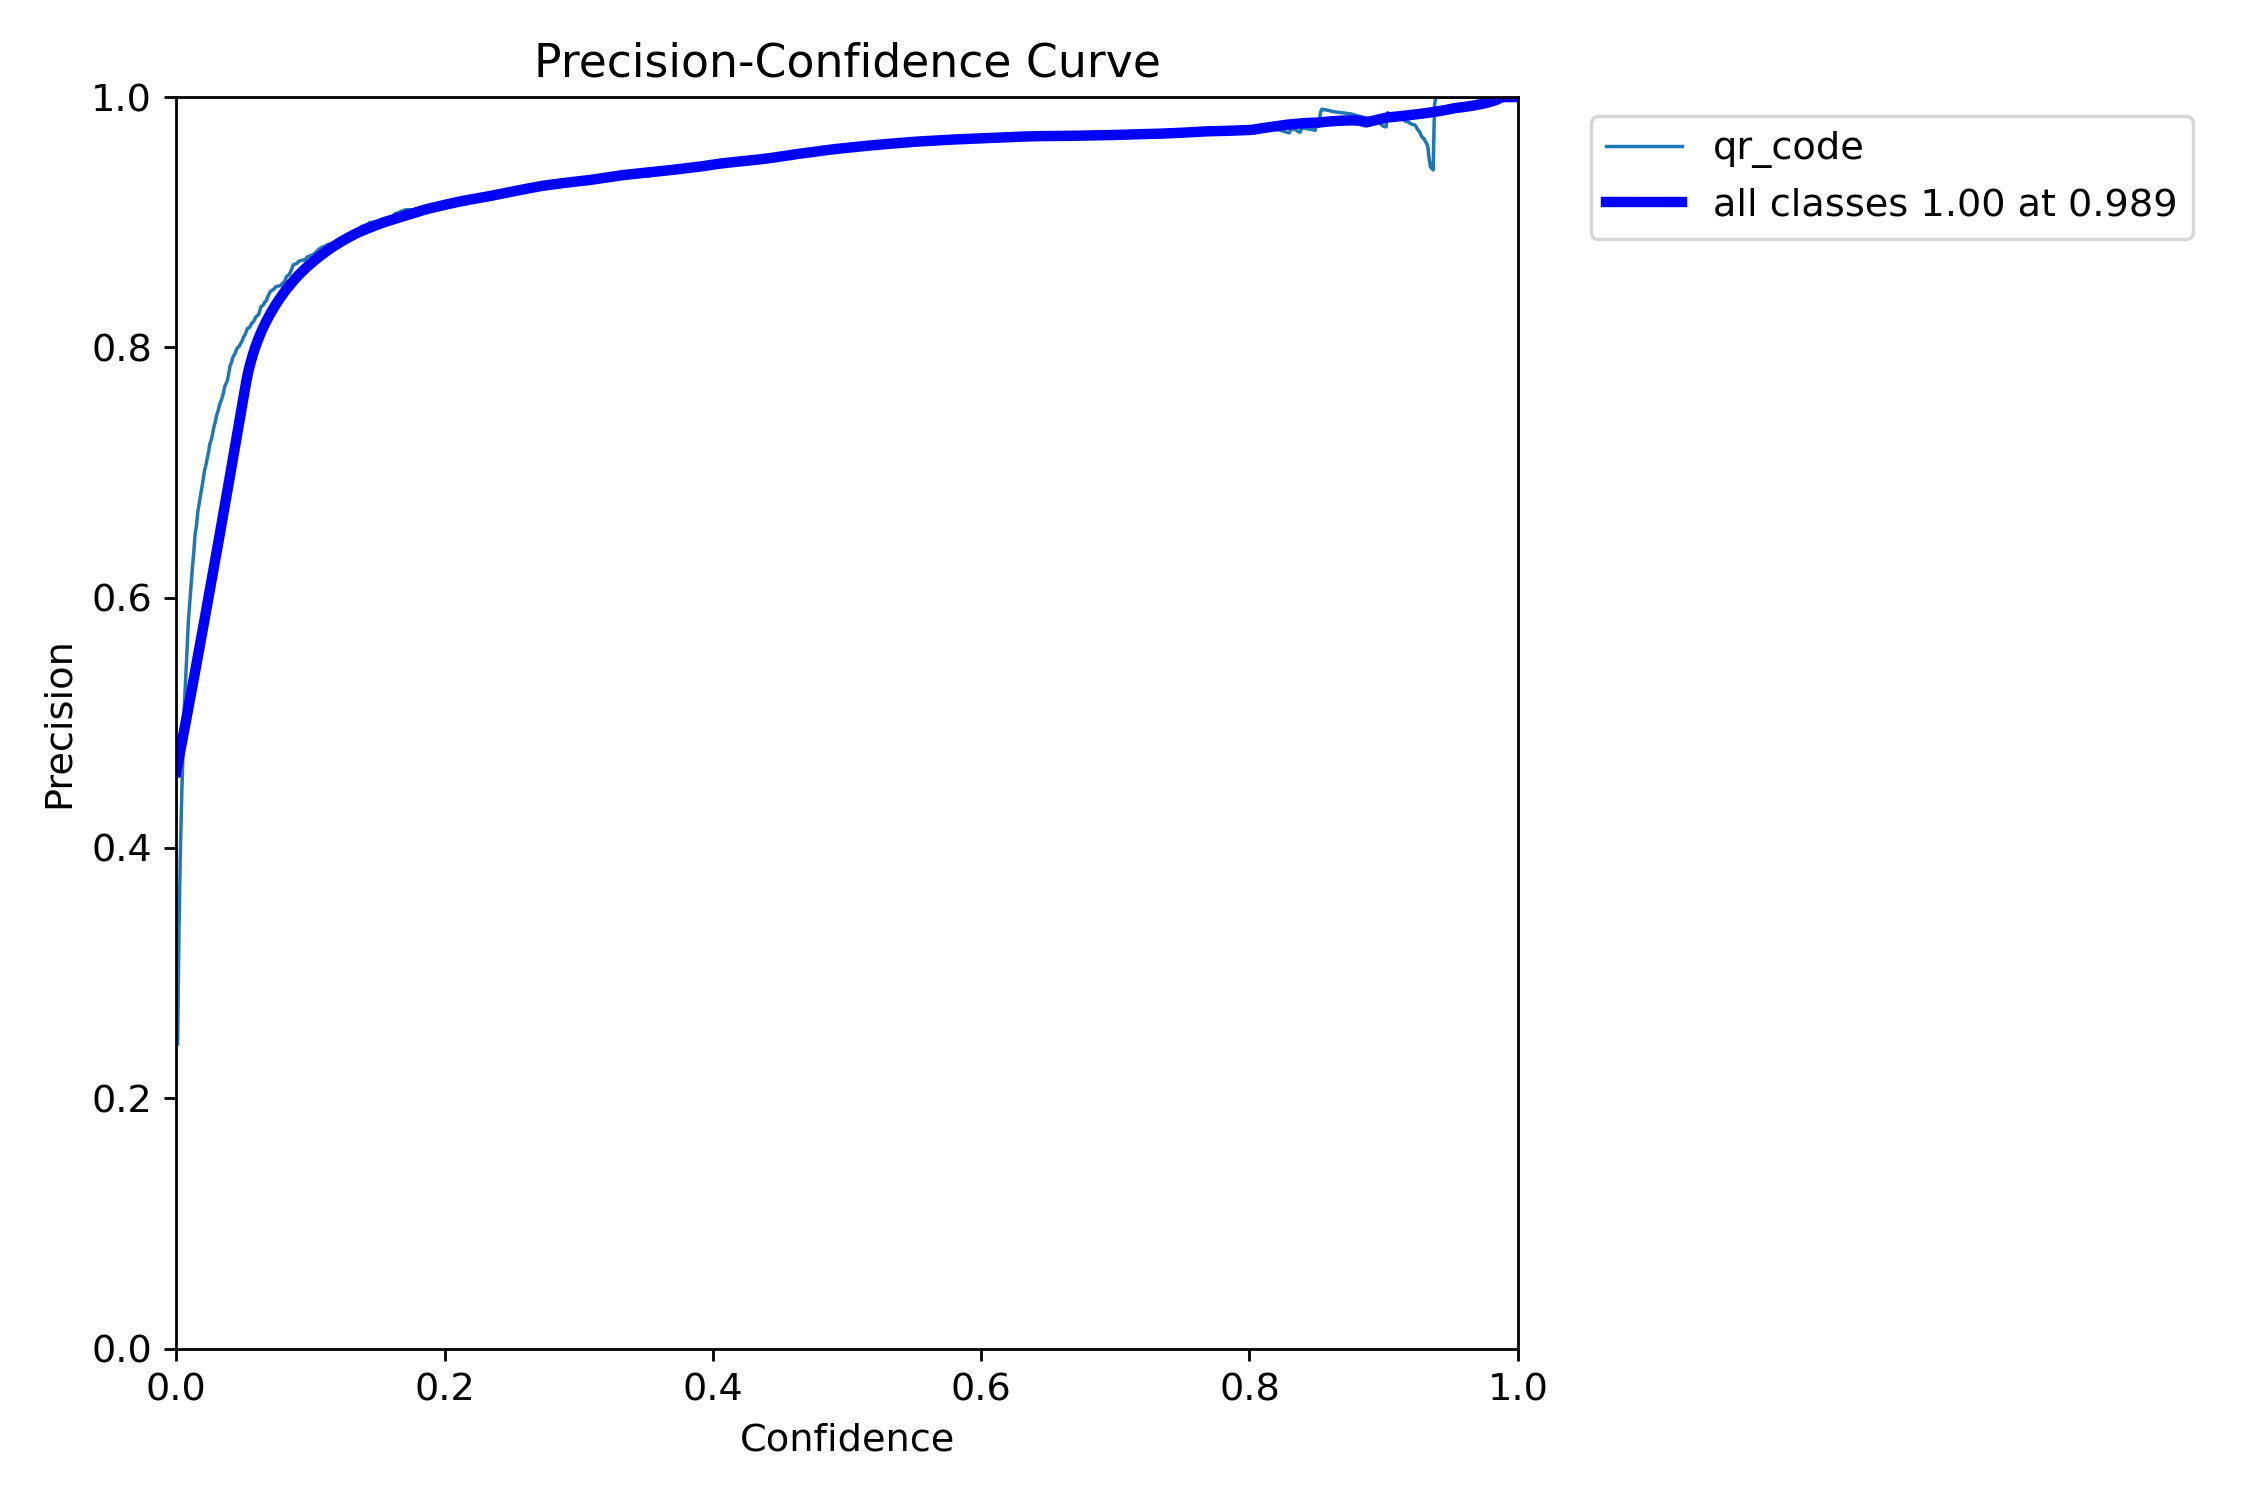

In [21]:
Image("/content/runs/detect/train/BoxP_curve.png", width = 600)

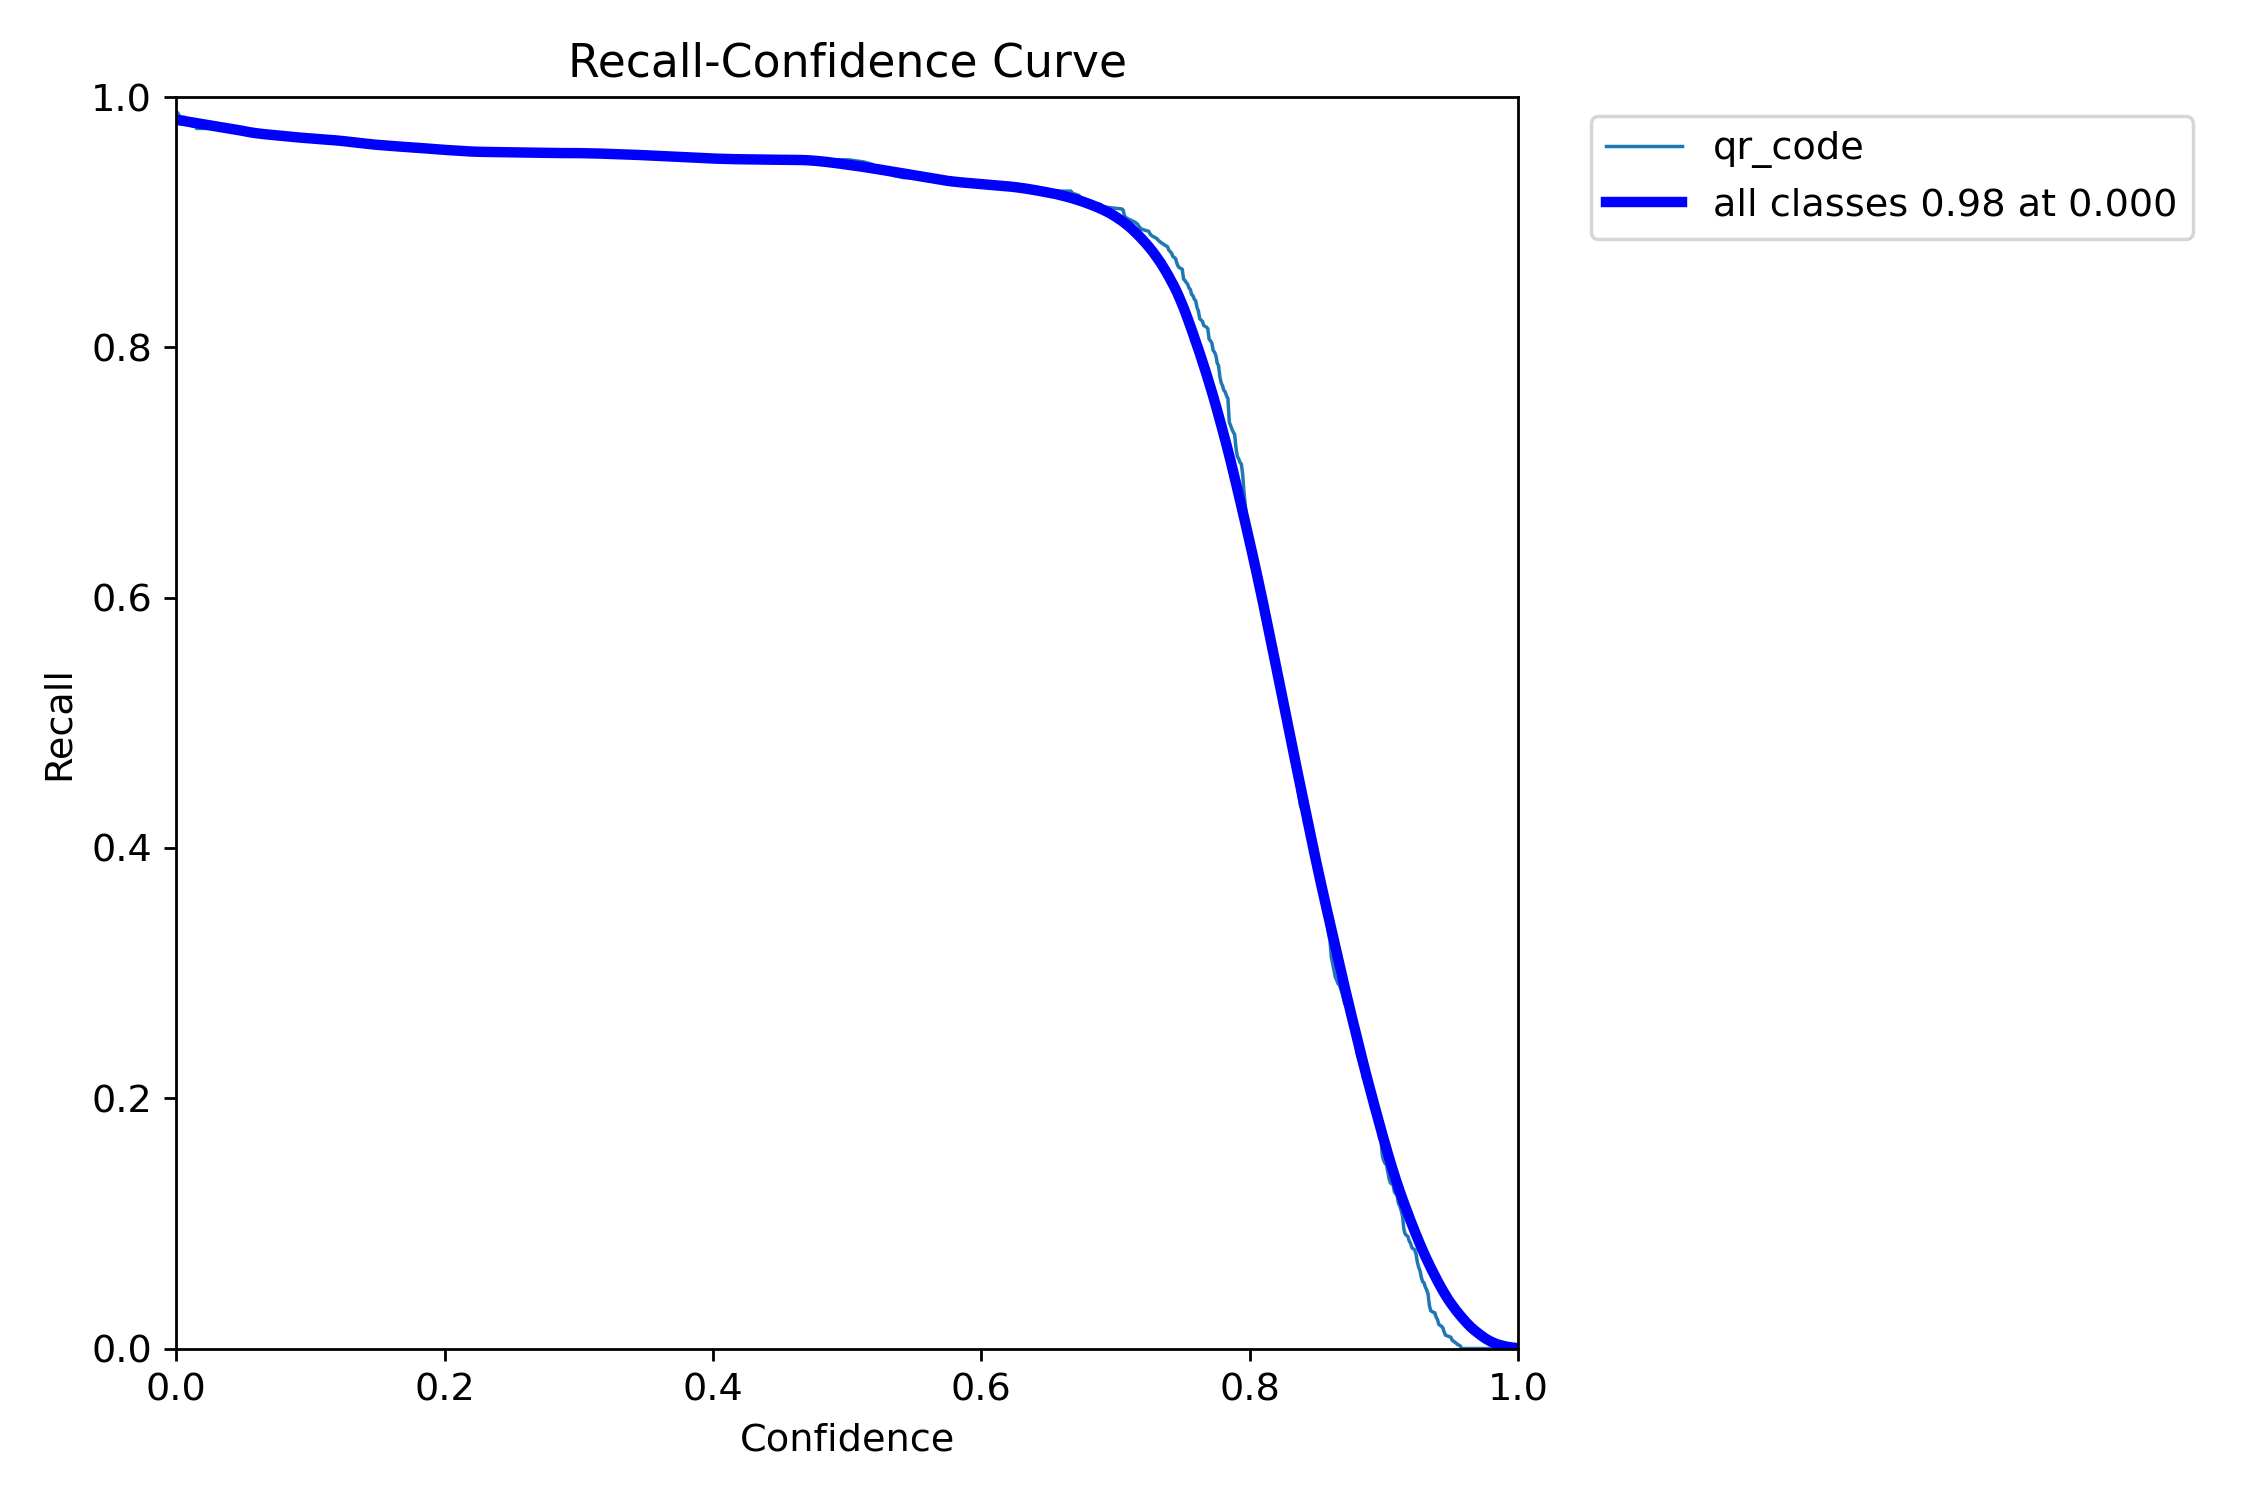

In [22]:
Image("/content/runs/detect/train/BoxR_curve.png", width=600)

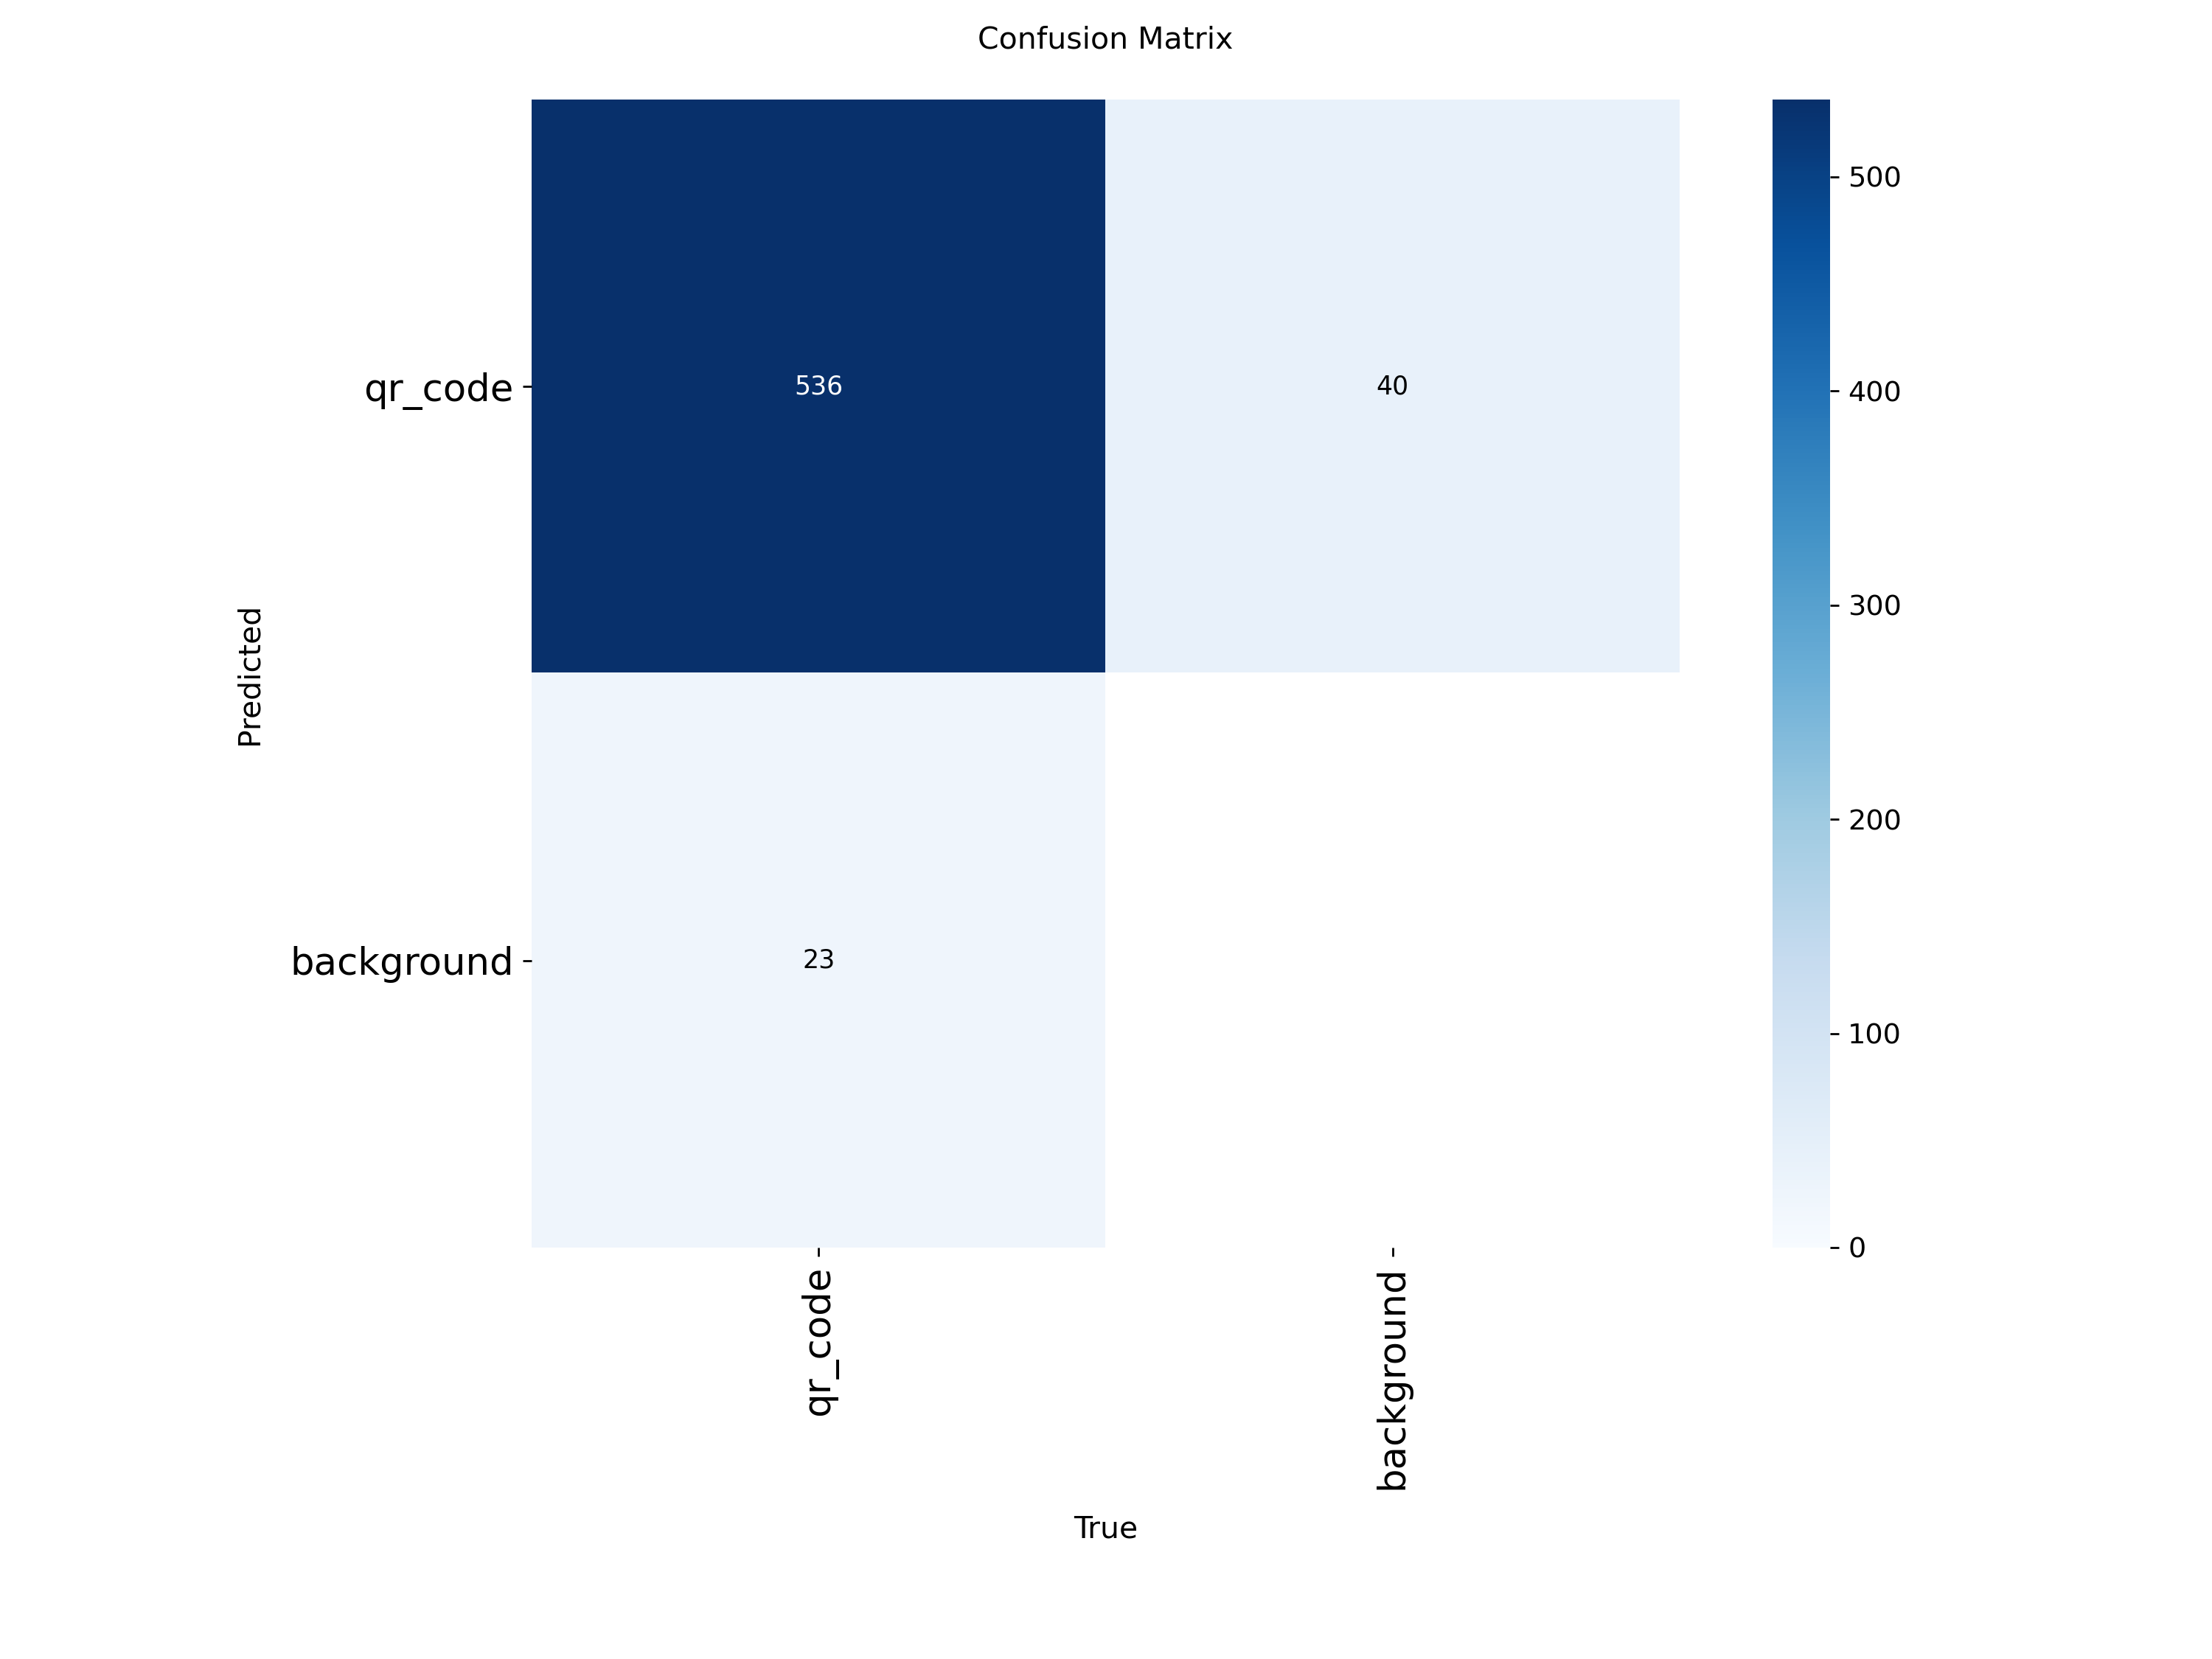

In [23]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

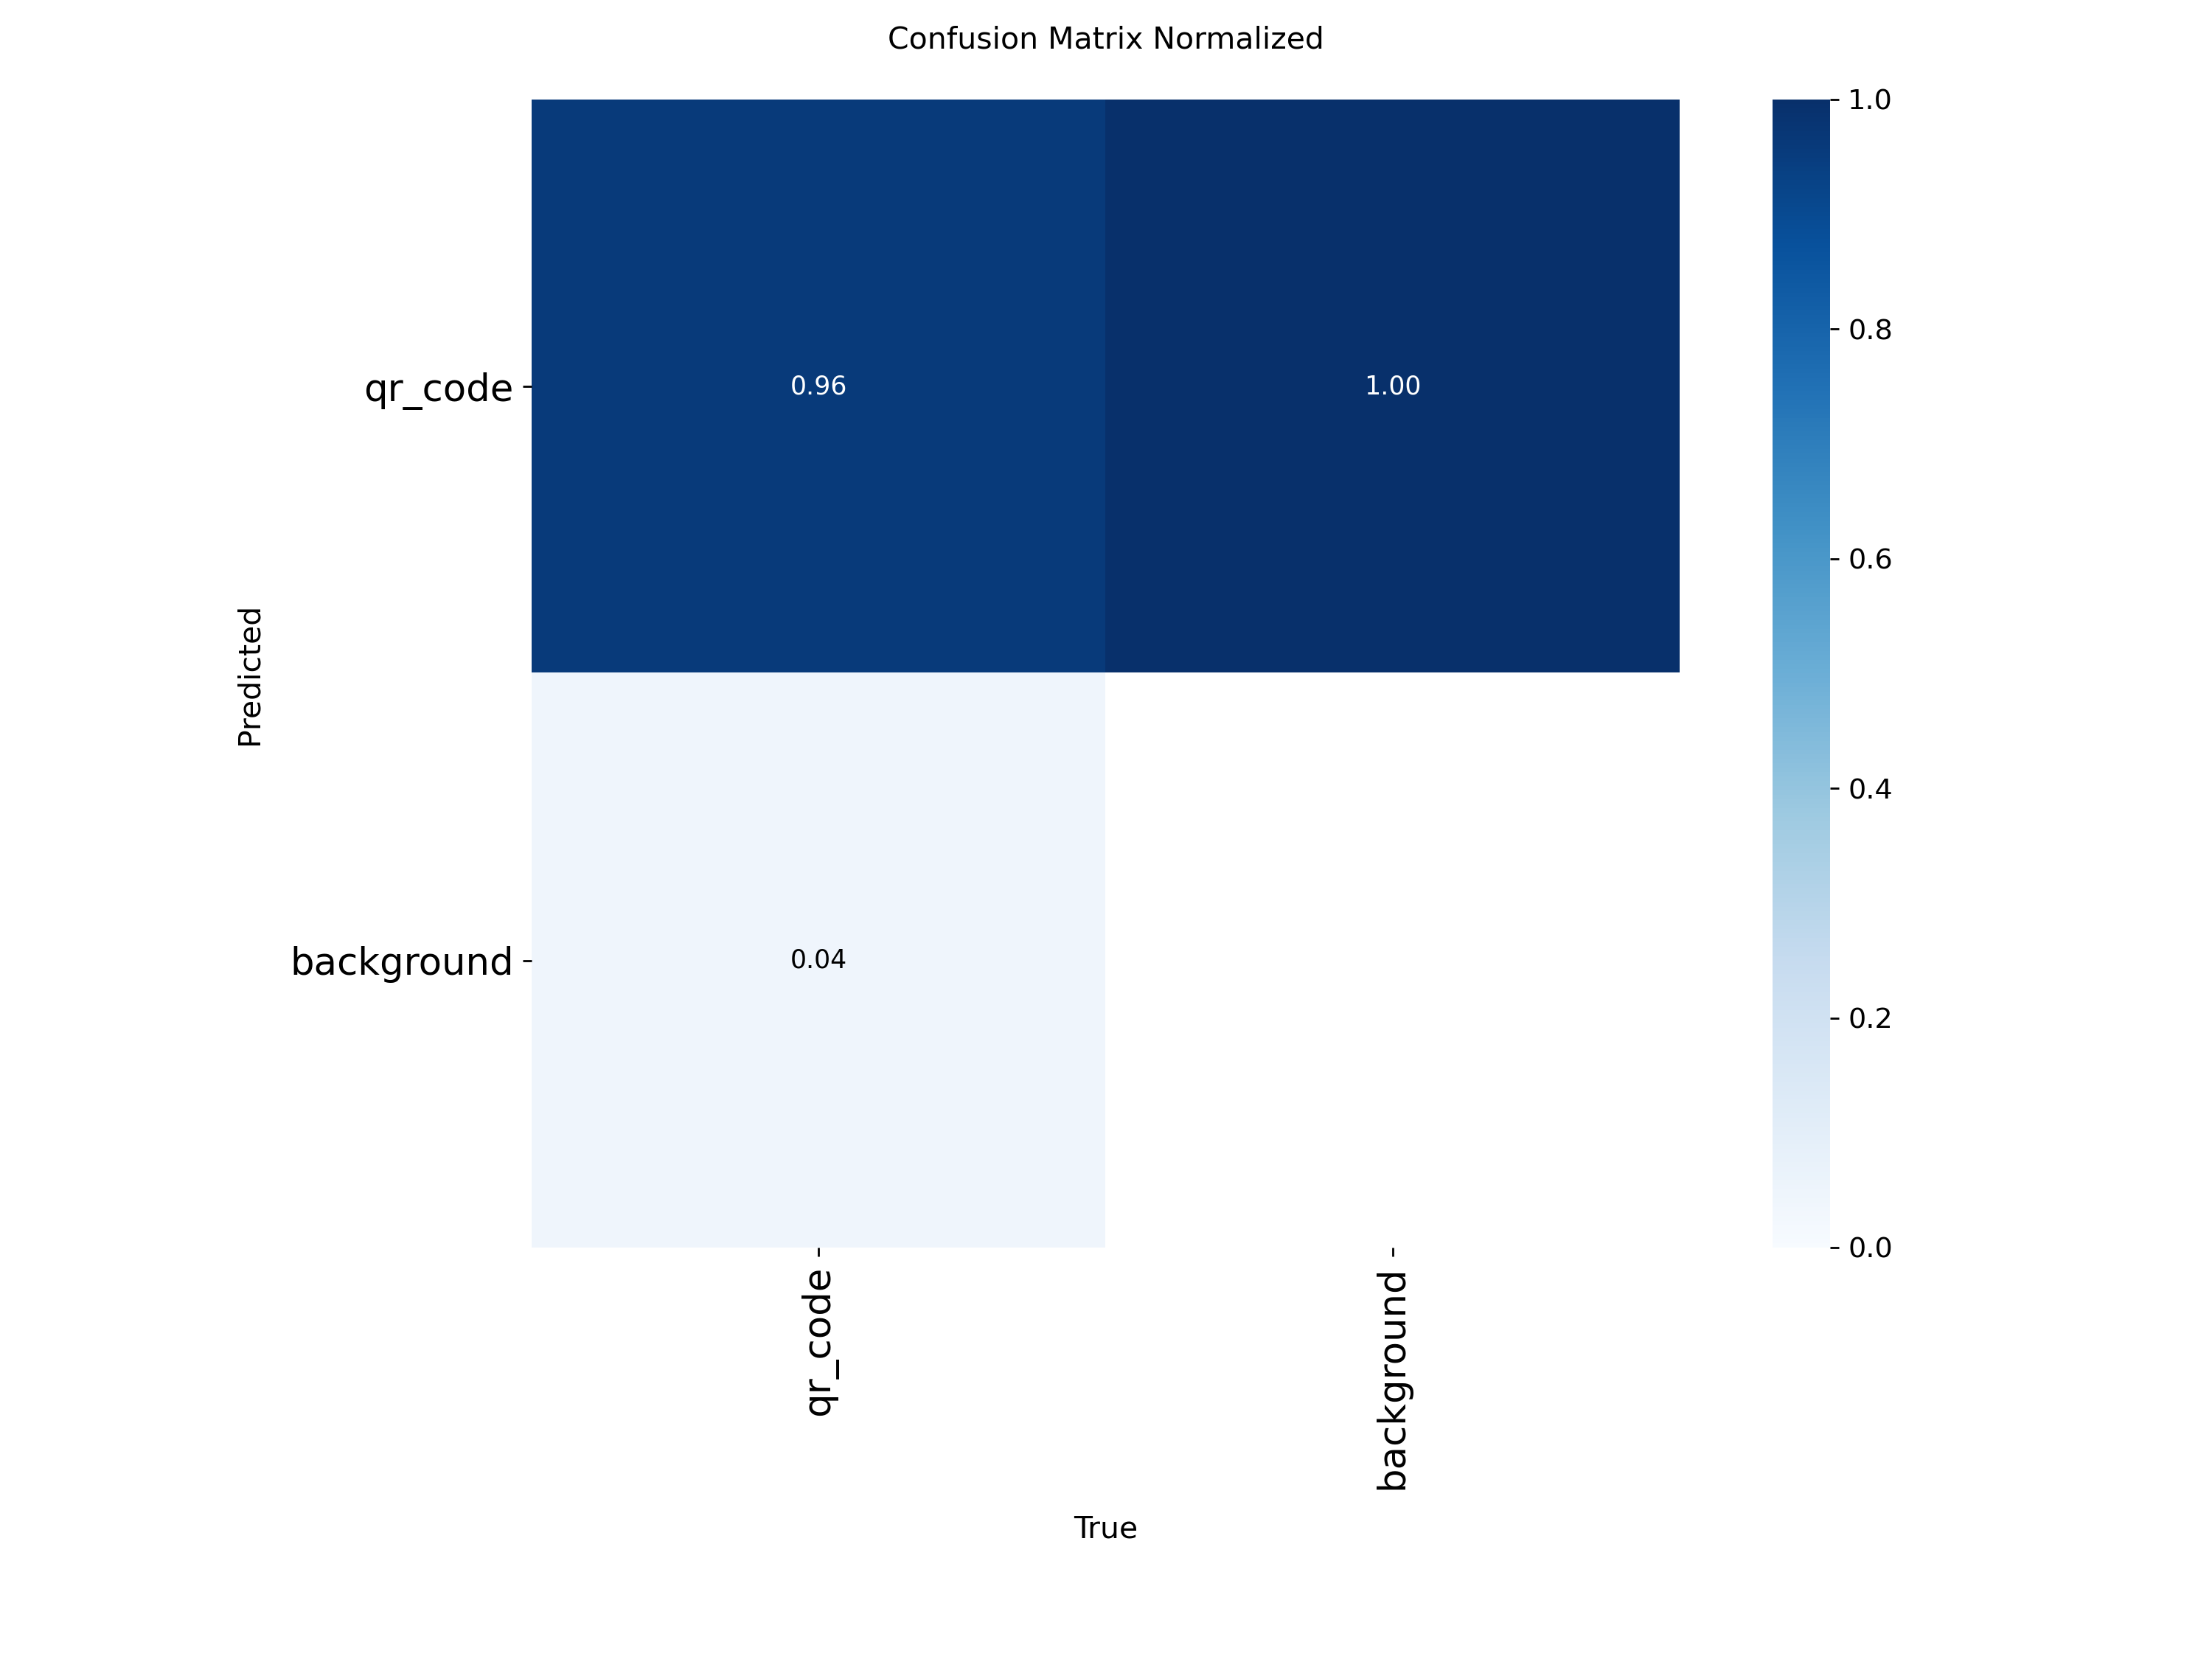

In [24]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

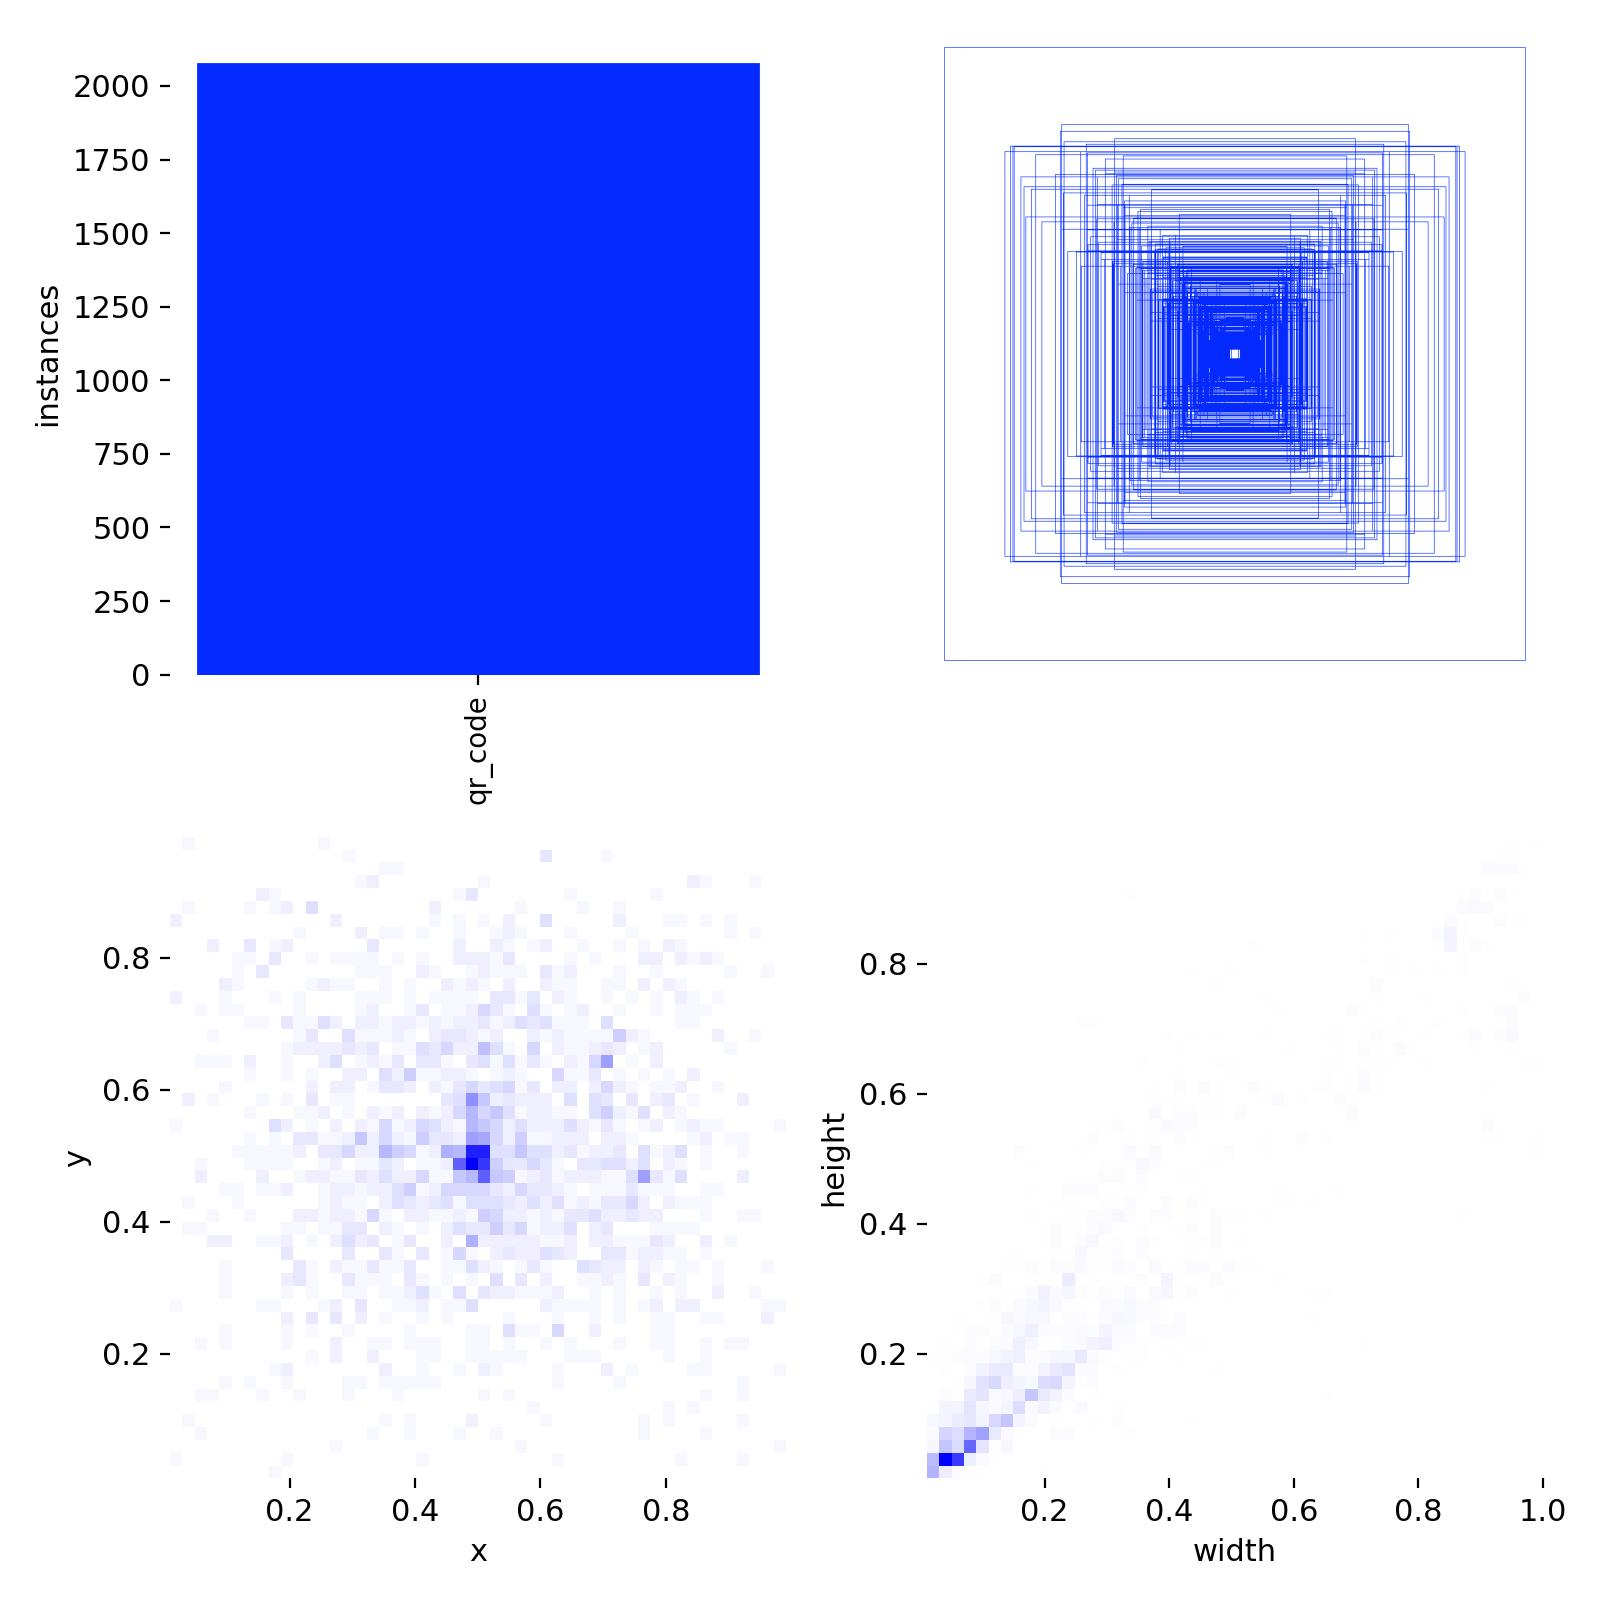

In [31]:
Image("/content/runs/detect/train/labels.jpg", width=600)

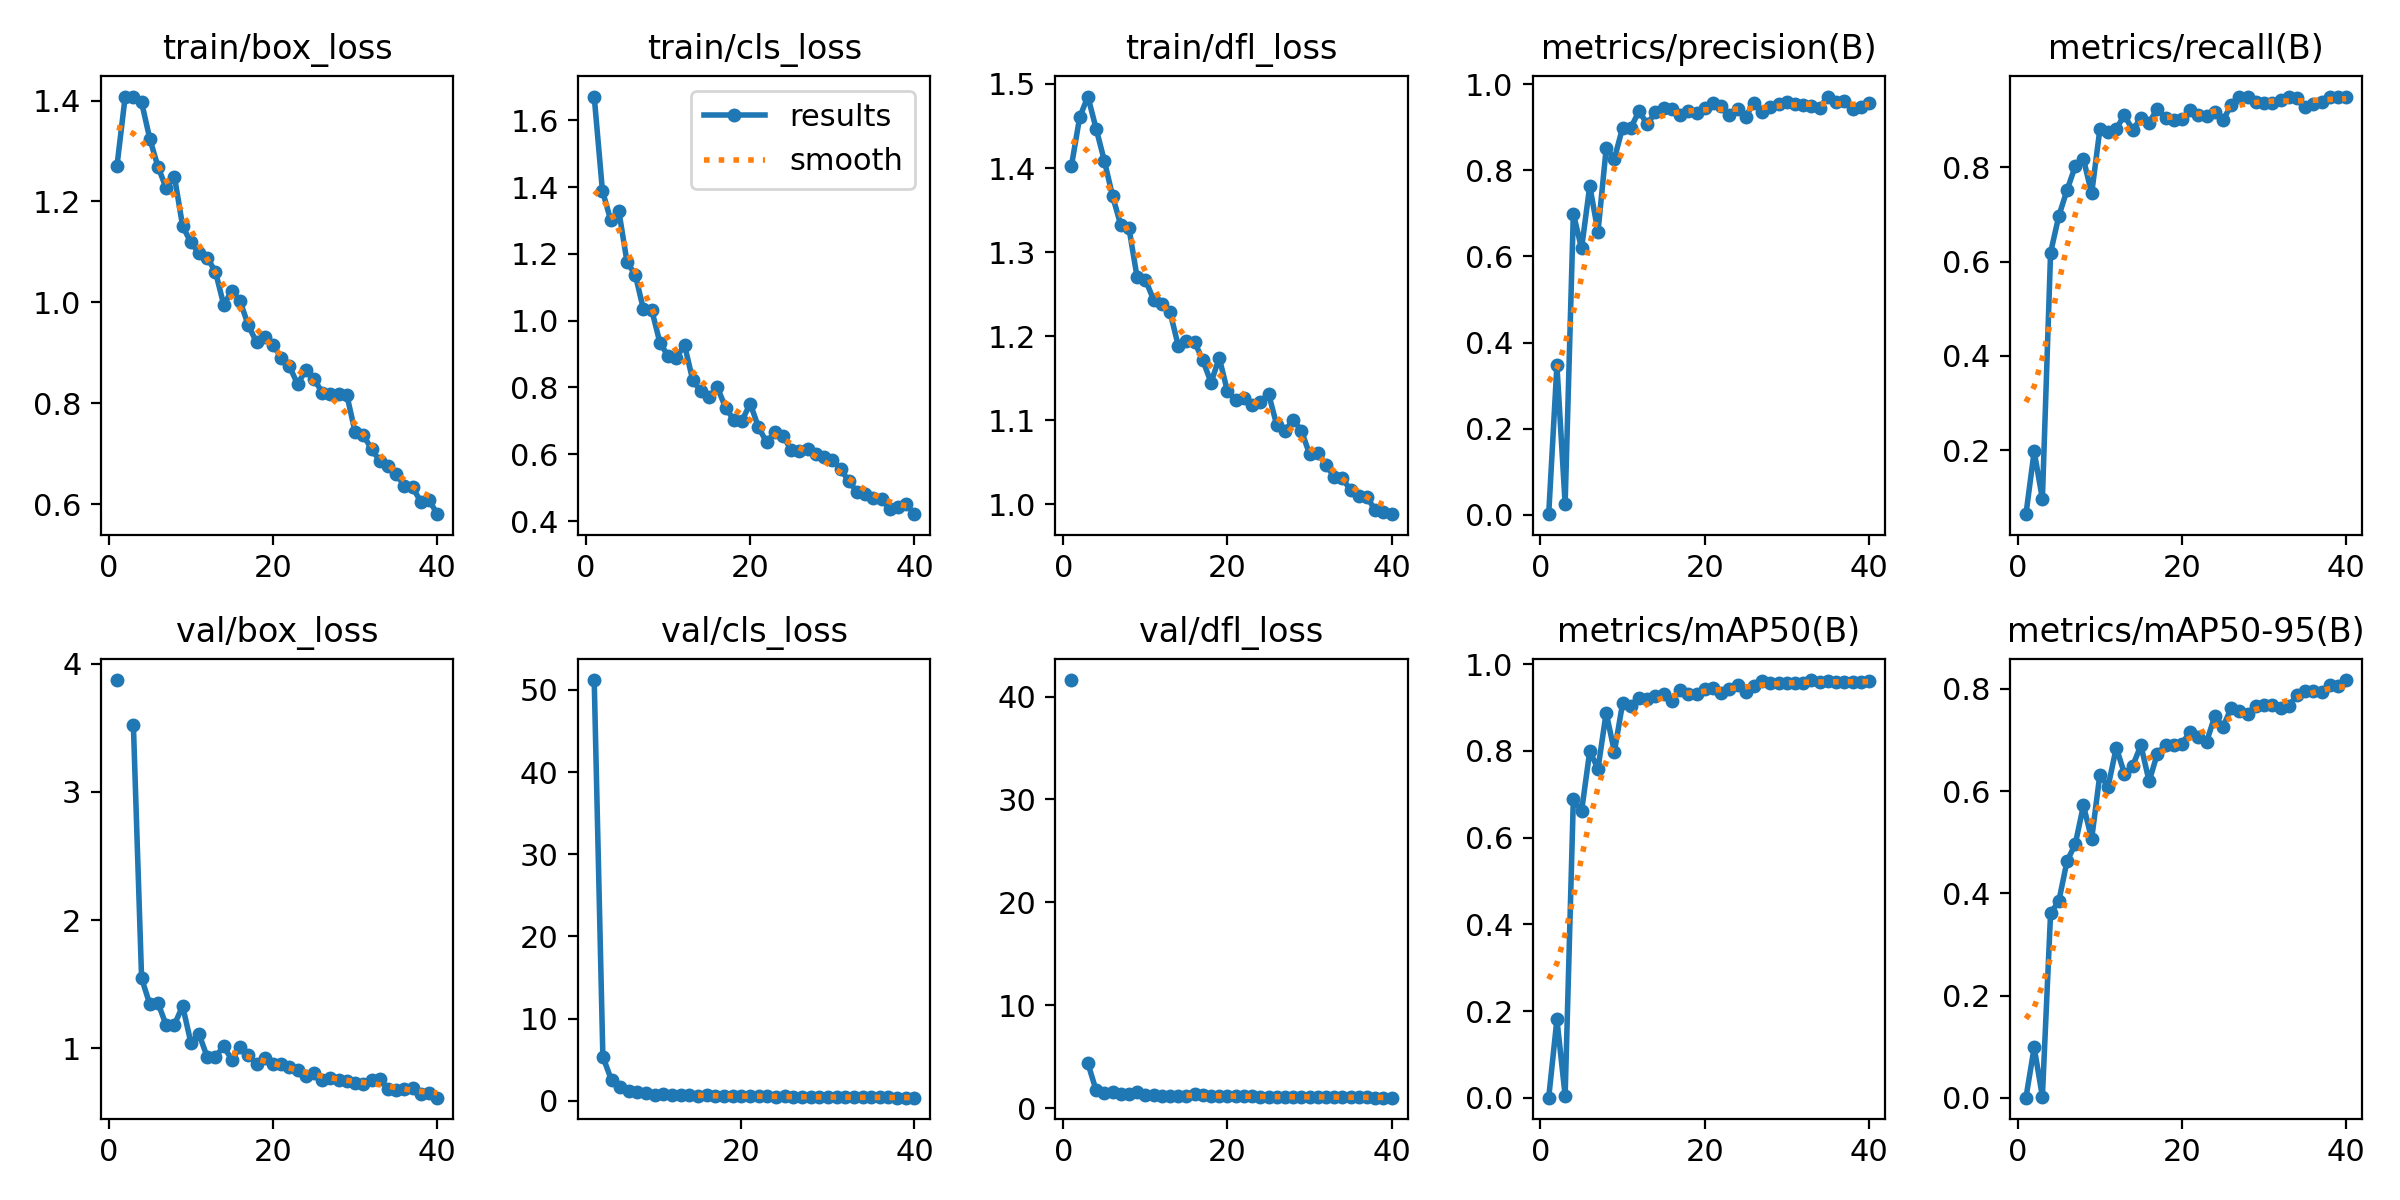

In [32]:
Image("/content/runs/detect/train/results.png", width=600)

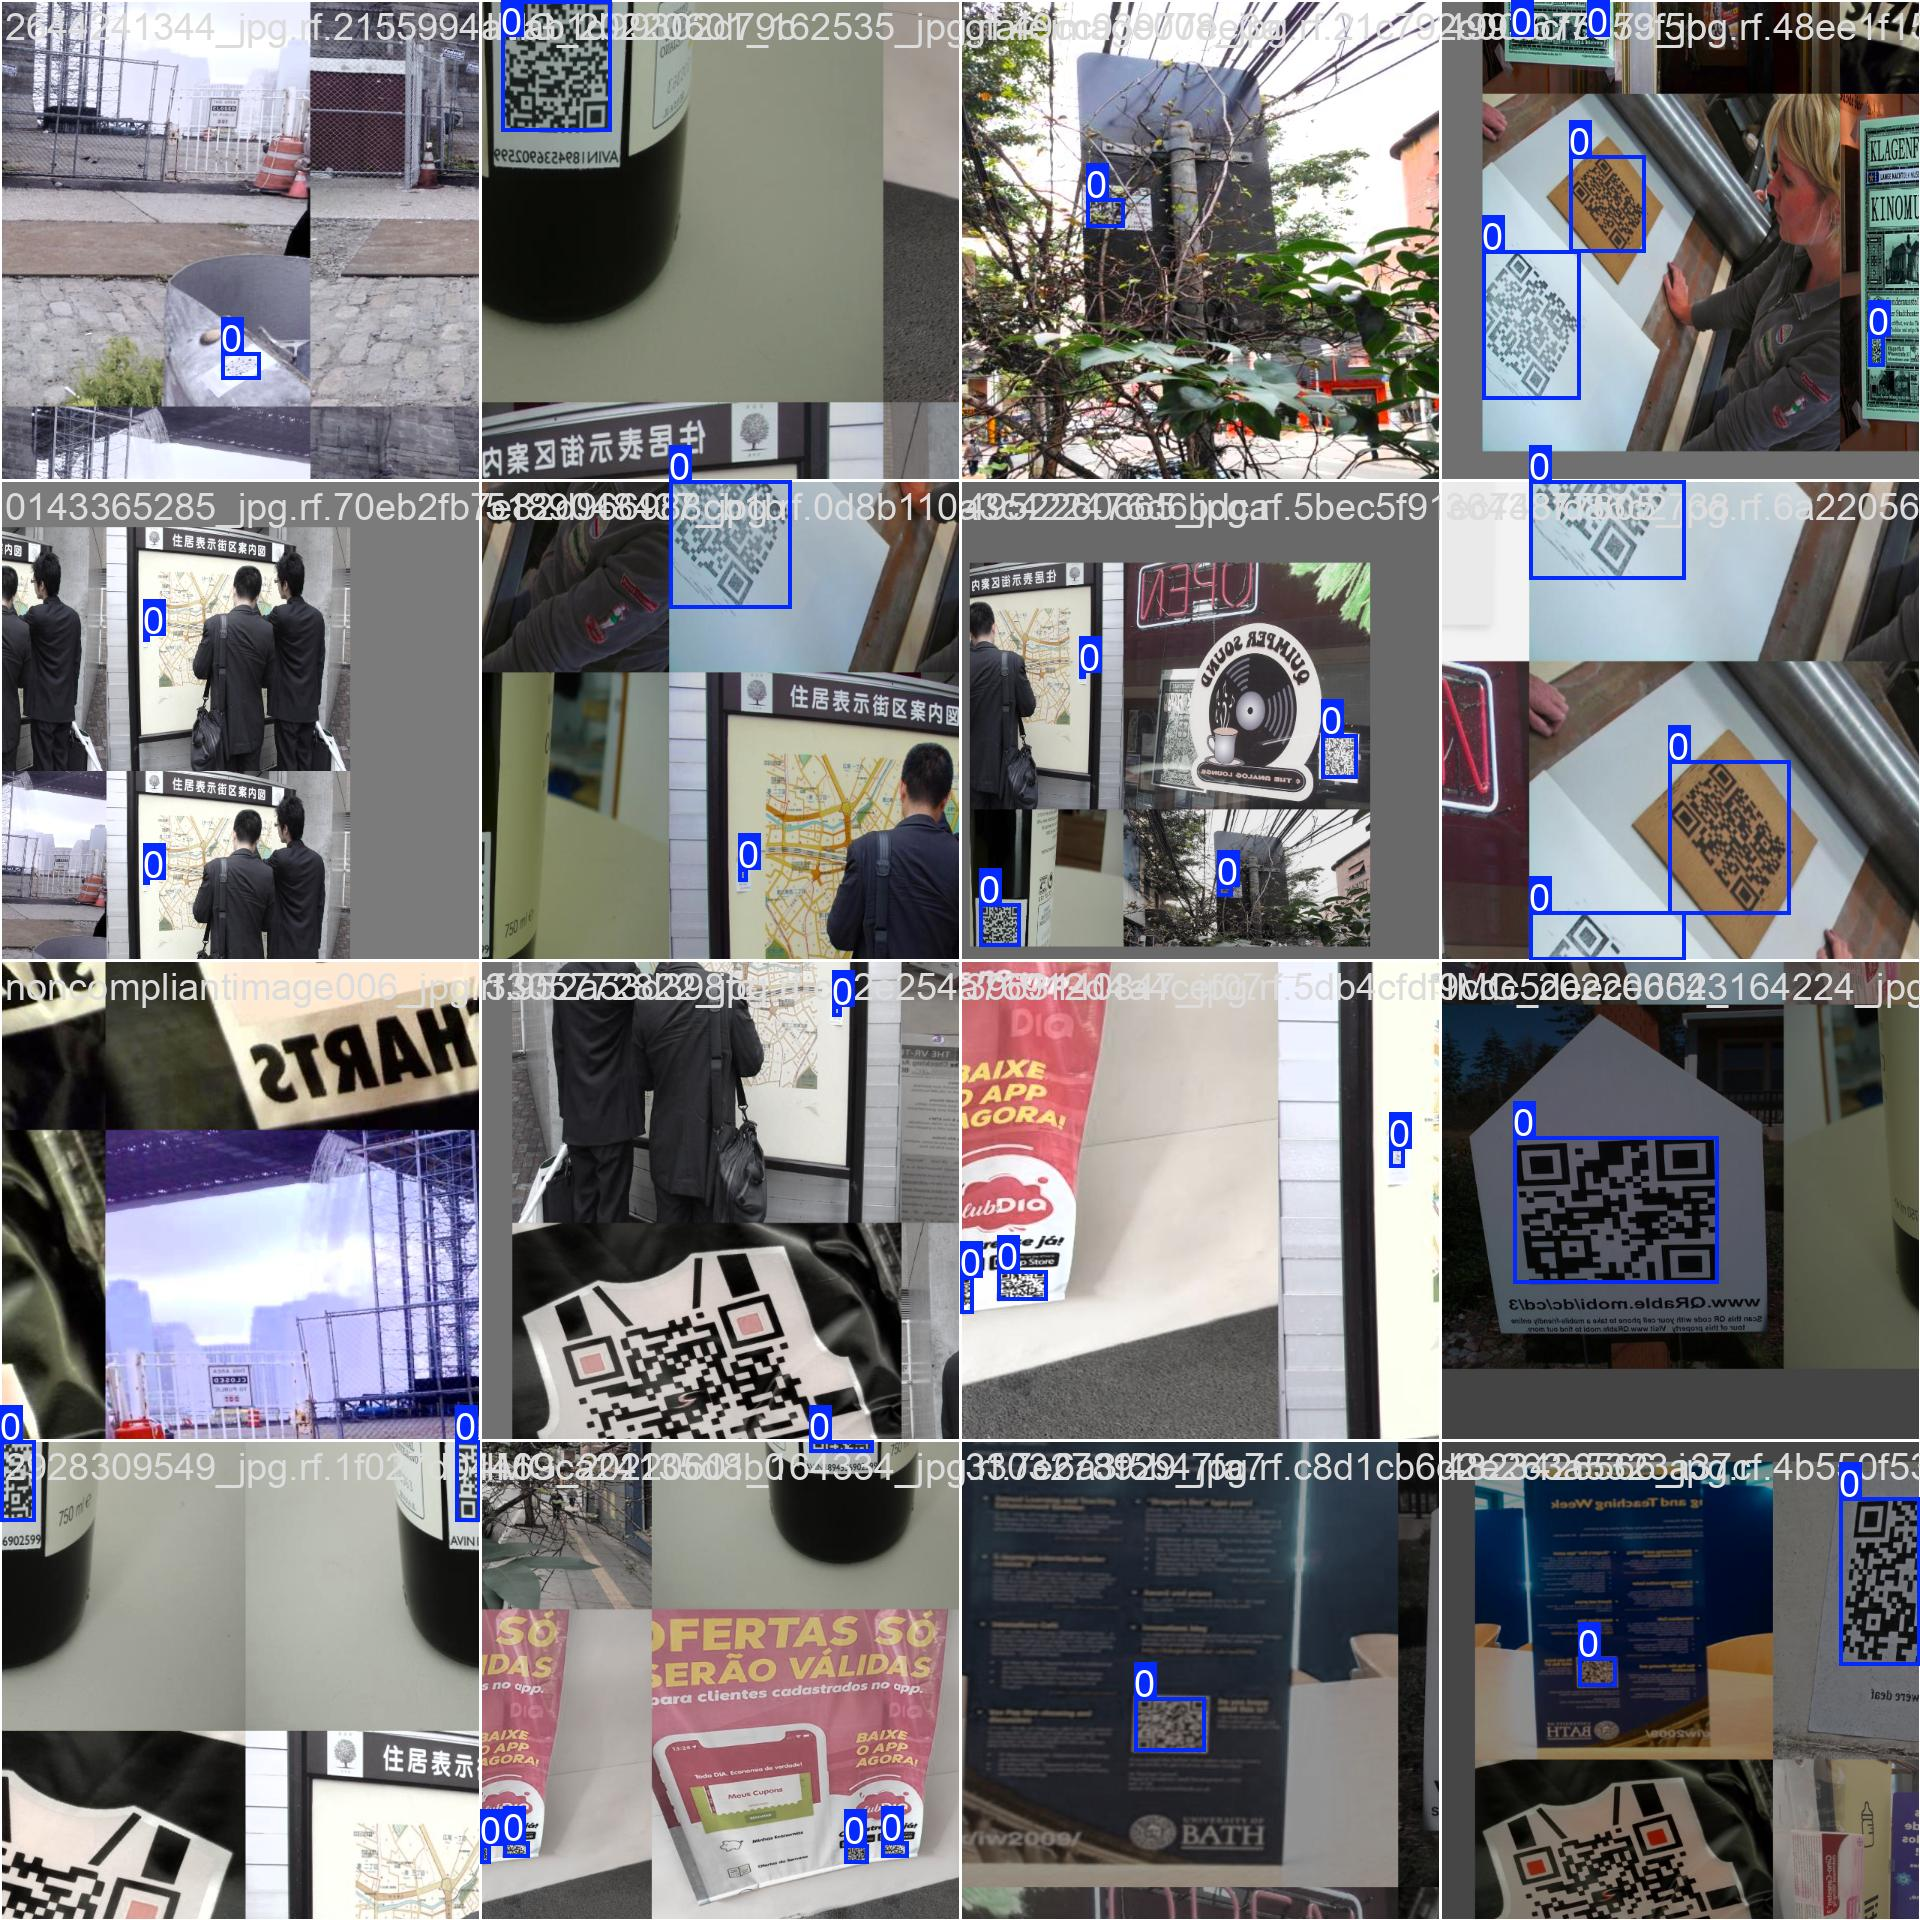

In [35]:
Image("/content/runs/detect/train/train_batch1.jpg", width=600)

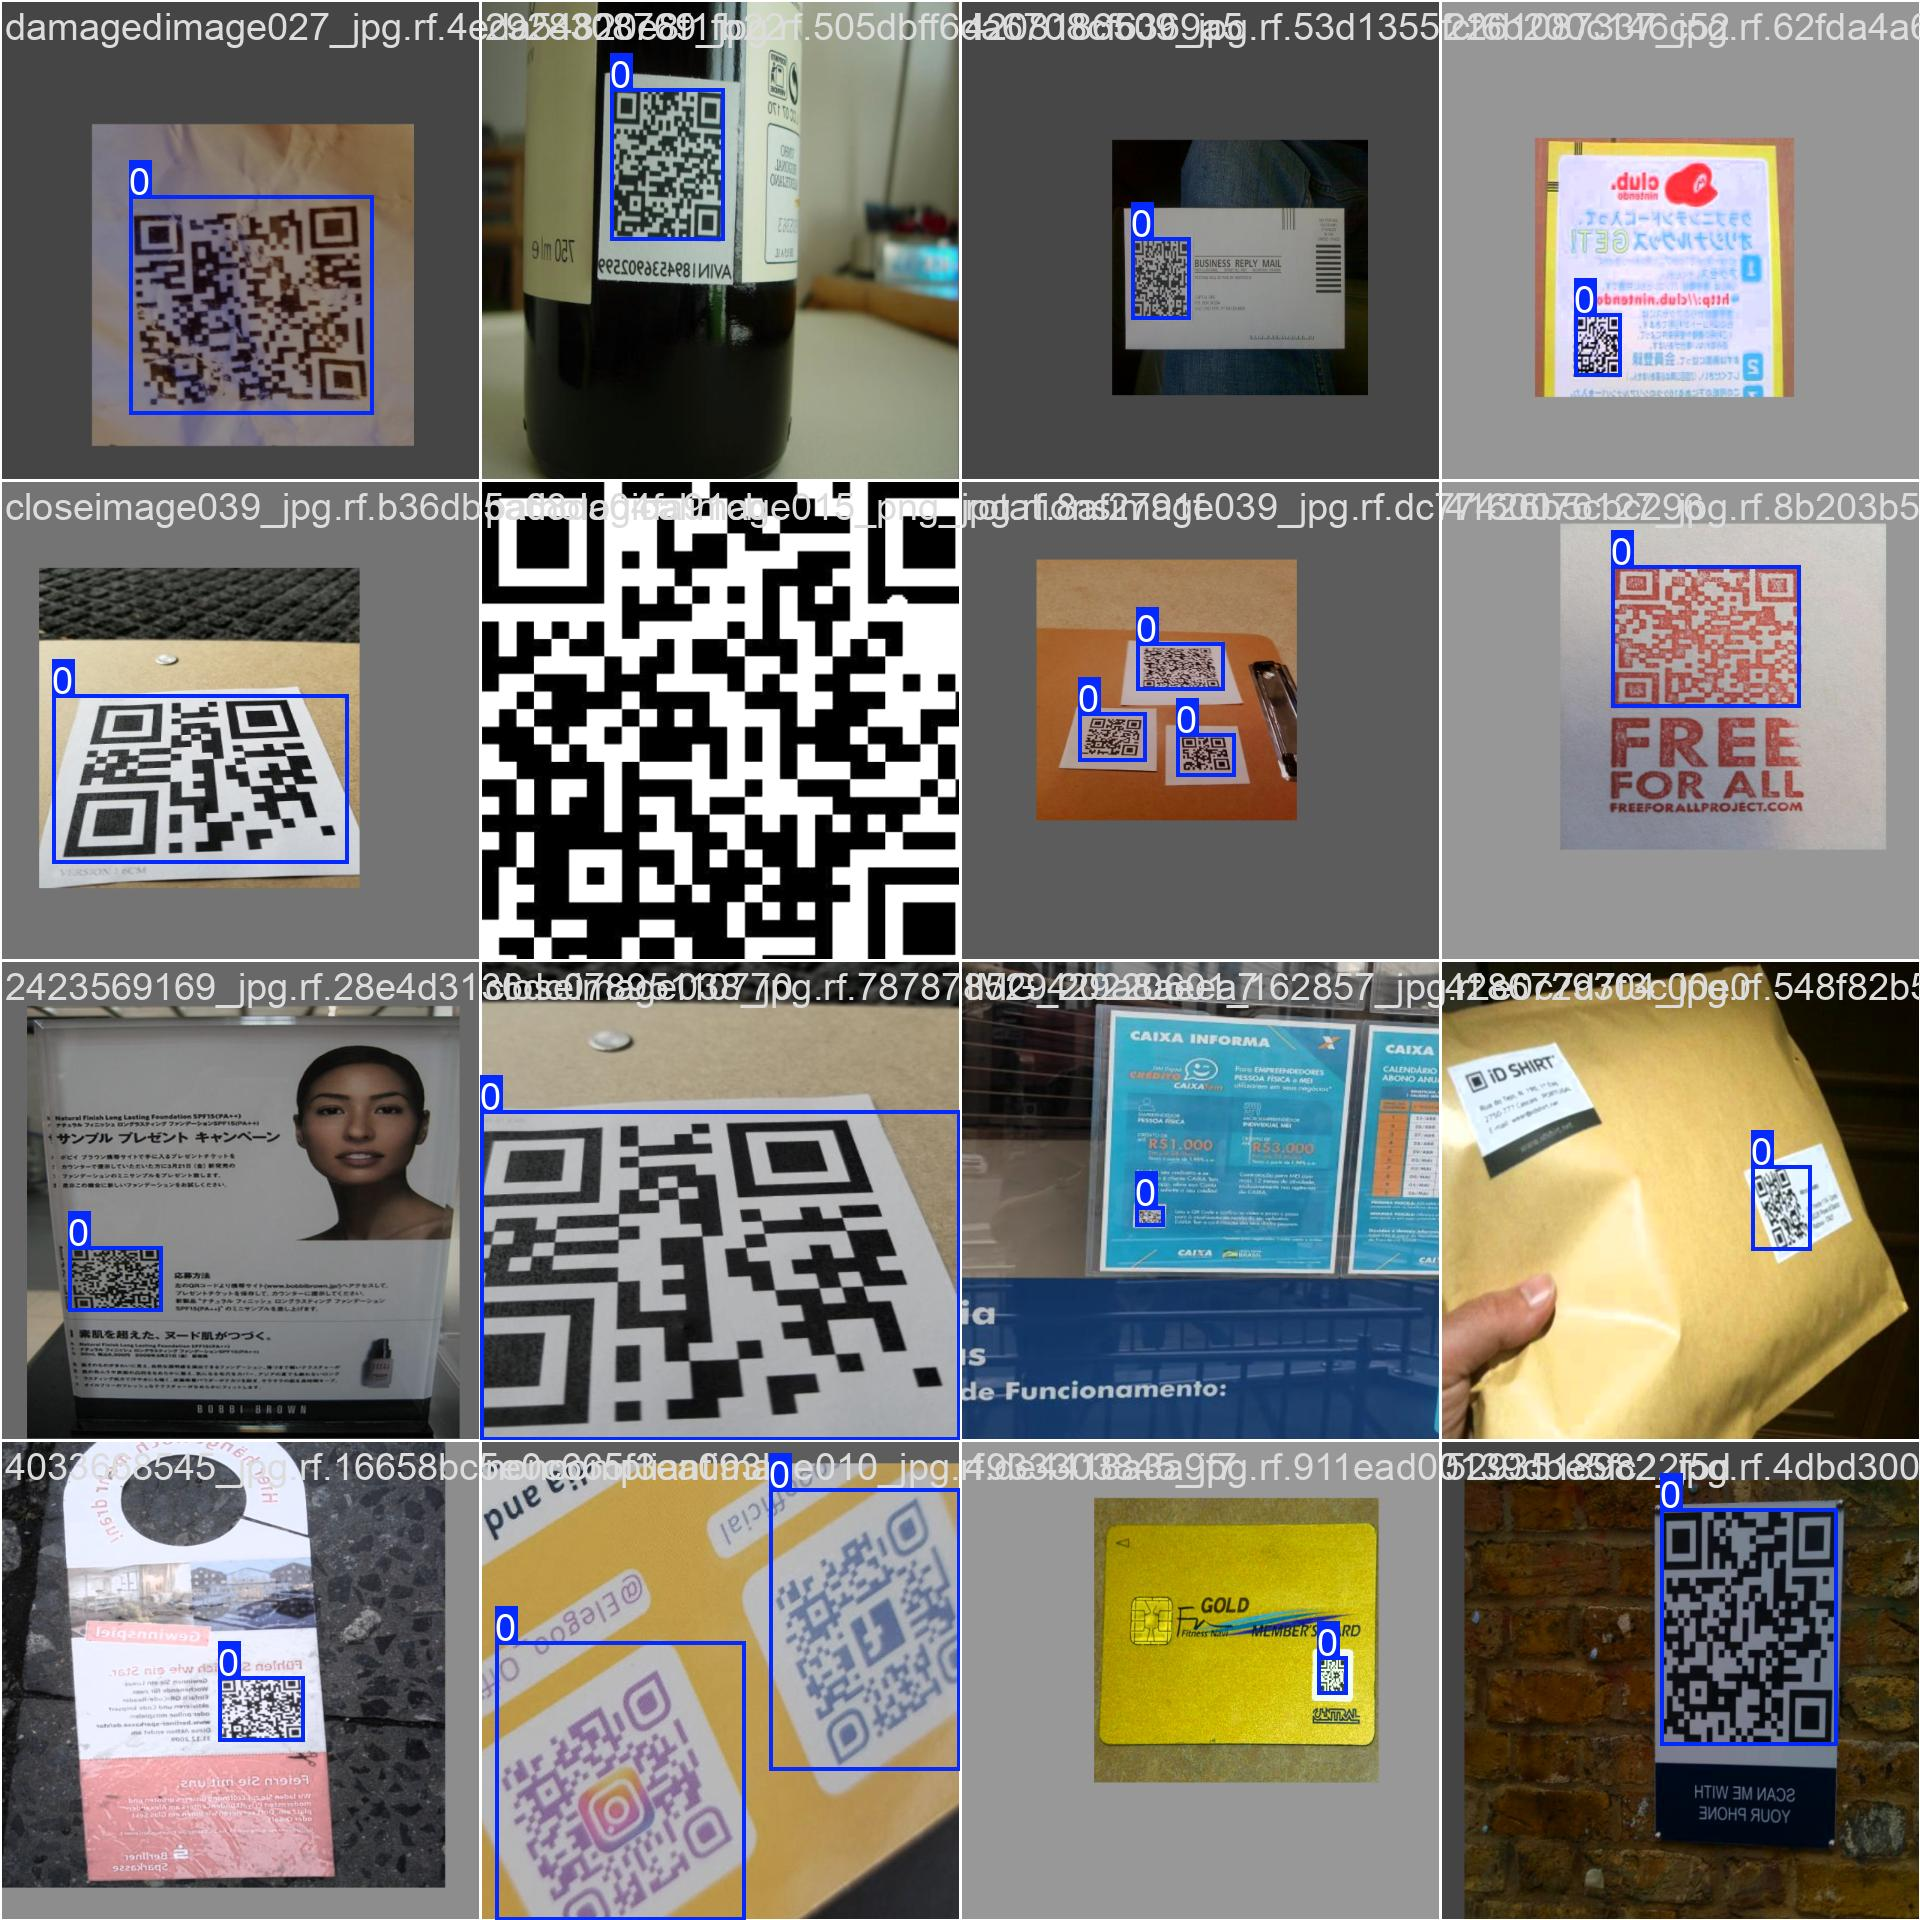

In [36]:
Image("/content/runs/detect/train/train_batch2280.jpg", width =600)

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Downloading Weights

In [60]:
!gdown "https://drive.google.com/uc?id=1gbdNR5L3y2yip7sr_bgkxF3T6CmeCHts&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1gbdNR5L3y2yip7sr_bgkxF3T6CmeCHts&confirm=t
To: /content/best.pt
100% 40.5M/40.5M [00:00<00:00, 91.9MB/s]


###Validating the Model

In [61]:
!yolo task=detect mode=val model=best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1086.7±173.3 MB/s, size: 29.9 KB)
val: Scanning /content/QR-code-1/valid/labels.cache... 337 images, 7 backgrounds, 0 corrupt: 100% 337/337 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:11<00:00,  1.97it/s]
                   all        337        559      0.958       0.95      0.962      0.818
Speed: 1.2ms preprocess, 23.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


###Predicting through TrainedModel

In [64]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/168 /content/QR-code-1/test/images/0050027974_jpg.rf.5addfd5b0e2b9fa1ddad456f3cc9413e.jpg: 640x640 1 qr_code, 36.8ms
image 2/168 /content/QR-code-1/test/images/0071851287_jpg.rf.2a77105b5b9cabaa7b31337eae556ca8.jpg: 640x640 2 qr_codes, 36.9ms
image 3/168 /content/QR-code-1/test/images/0097495610_jpg.rf.d11d13d27d438da661b568d574161e7c.jpg: 640x640 2 qr_codes, 36.8ms
image 4/168 /content/QR-code-1/test/images/0179583169_jpg.rf.19f37723aee16a798d7de06c4c872c8a.jpg: 640x640 1 qr_code, 34.8ms
image 5/168 /content/QR-code-1/test/images/0460681372_jpg.rf.fc01282154ab41515ea8ae349d7bcec4.jpg: 640x640 1 qr_code, 32.0ms
image 6/168 /content/QR-code-1/test/images/0575557590_jpg.rf.d551017b3a8fd302297000048ecf7b0c.jpg: 640x640 1 qr_code, 31.9ms
image 7/168 /content/QR-code-1/test/images/1073_U7zz1gn3C_jpg.rf.9542265453fefb

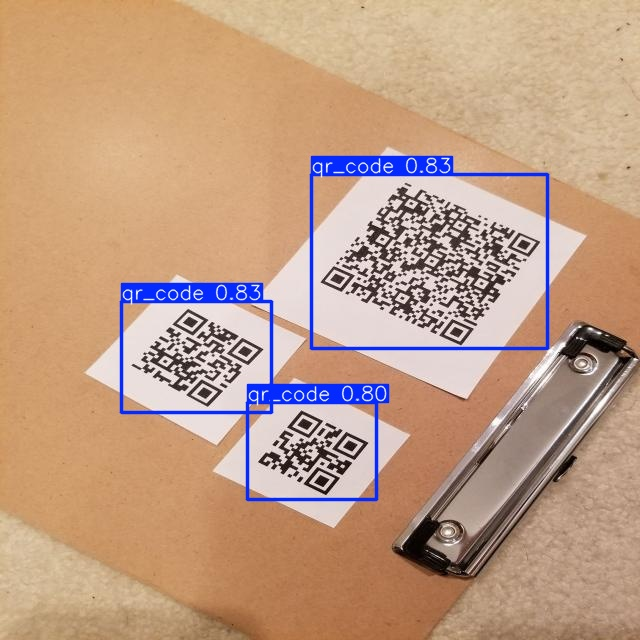

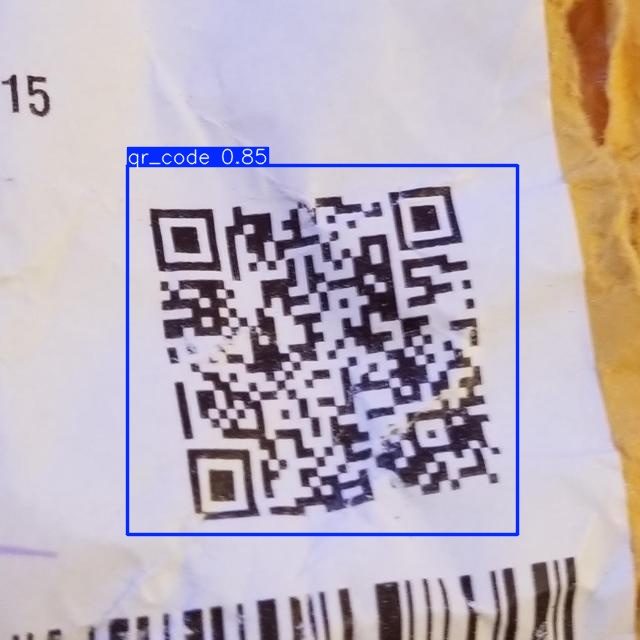

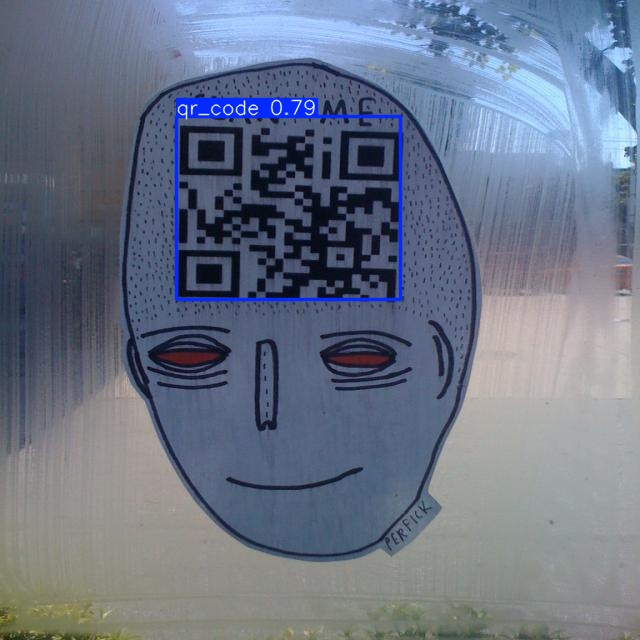

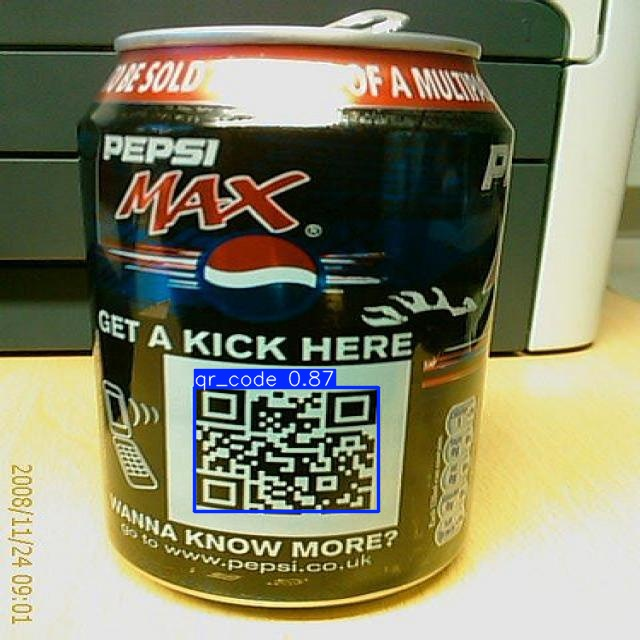

In [66]:
import glob
import os
from IPython.display import Image as IPyImage , display

latest_folder = max(glob.glob('/content/runs/detect/predict*/') , key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:5]:
  display(IPyImage(filename=img , width = 550))
  print("\n")